# PROJECT PROPOSAL FOR CREDIT CARD APPROVAL AND ITS NEED.

Out of the many roles one of the role of the banks are to provide credit card to an applicant.Banks take this decisions based on the applicant's profile (eg. like high loan balances,low-income levels, or too many inquiries on an individual’s credit report).

There are two types of risk associated with the bank’s decision.
*Not approving a credit card to a good potential applicant is a loss of business to the bank.
*While approving a credit card to an applicant having a bad credit risk is also a loss of business to the bank.
Also Manually analyzing these applications is mundane, error-prone, and time-consuming. 

Fortunately, this task can be automated with the power of machine learning, and pretty much every commercial bank does. 
The aim of the project is to build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### Hypothesis which needs to be verified with my data


1) High Income families will be provided a credit cards.
2) Young working people will be considered over retired senior citizens.
3) People owning property or car  will tend to provided for credit cards as the property can be consiedred as a colateral
4) People living on pension might not be considered for credit card.


In [ ]:
# importing  the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame

#### Importing the data and going over through statistical values

In [2]:
card_data=pd.read_csv("Credit_Card.csv")
card_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
card_data.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [4]:
card_status=pd.read_csv("Credit_Card_label.csv")
card_status.head(10)


,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
5,5009753,1
6,5009754,1
7,5009894,1
8,5010864,1
9,5010868,1


In [5]:
print("Shape of card_data:",card_data.shape)
print("Shape of card_status:",card_status.shape)


Shape of card_data: (1548, 18)
Shape of card_status: (1548, 2)


In [6]:
print("dataframe info of card_data:",card_data.info())
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("dataframe info of card_status:",card_status.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [7]:
print("statistical info of card_data:")
card_data.describe()

statistical info of card_data:


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [8]:
print("statistical info of card_status:")
card_status.describe()

statistical info of card_status:


,Ind_ID,label
count,1.548000e+03,1548.000000
mean,5.078920e+06,0.113049
std,4.171759e+04,0.316755
min,5.008827e+06,0.000000
25%,5.045070e+06,0.000000
50%,5.078842e+06,0.000000
75%,5.115673e+06,0.000000
max,5.150412e+06,1.000000


In [9]:
print('Number of unique values in each column')
print("- - - - - - - - - - - - - - -")
print(card_data.nunique())
print("- - - - - - - - - - - - - - -")
print("- - - - - - - - - - - - - - -")
print(card_status.nunique())

Number of unique values in each column
- - - - - - - - - - - - - - -
Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
dtype: int64
- - - - - - - - - - - - - - -
- - - - - - - - - - - - - - -
Ind_ID    1548
label        2
dtype: int64


In [10]:
print("Getting the unique values of each column")
print("- - - - - - - - - - - - - - -")
unique_data = {}
for column in card_data.columns:
    unique_data[column] = card_data[column].unique()
unique_data

Getting the unique values of each column
- - - - - - - - - - - - - - -


{'Ind_ID': array([5008827, 5009744, 5009746, ..., 5115992, 5118219, 5053790],
       dtype=int64),
 'GENDER': array(['M', 'F', nan], dtype=object),
 'Car_Owner': array(['Y', 'N'], dtype=object),
 'Propert_Owner': array(['Y', 'N'], dtype=object),
 'CHILDREN': array([ 0,  1,  2,  4,  3, 14], dtype=int64),
 'Annual_income': array([ 180000. ,  315000. ,       nan,  450000. ,   90000. ,  472500. ,
         270000. ,  126000. ,  202500. ,  157500. ,  112500. ,  540000. ,
         292500. ,  135000. ,   76500. ,  215100. ,  225000. ,   67500. ,
         171000. ,  103500. ,   99000. ,  391500. ,   65250. ,   72900. ,
         360000. ,  256500. ,  675000. ,  247500. ,   85500. ,  121500. ,
         130500. ,  211500. ,   81000. ,   72000. ,  148500. ,  162000. ,
         195750. ,  585000. ,  216000. ,  306000. ,  108000. ,   63000. ,
          45000. ,  337500. ,  131400. ,  117000. ,  445500. ,  234000. ,
        1575000. ,  144000. ,   67050. ,   73350. ,  193500. ,  900000. ,
          94

In [11]:
# Sort the 'Employed_days' column and then count the values
sorted_dates = card_data['Employed_days'].value_counts().sort_index()

print(sorted_dates)

Employed_days
-14887       1
-13735       1
-13382       1
-13010       1
-12870       1
          ... 
-95          1
-89          1
-88          1
-73          2
 365243    261
Name: count, Length: 956, dtype: int64


In [12]:
unique_status = {}
for column in card_status.columns:
    unique_status[column] = card_status[column].unique()
unique_status

{'Ind_ID': array([5008827, 5009744, 5009746, ..., 5115992, 5118219, 5053790],
       dtype=int64),
 'label': array([1, 0], dtype=int64)}

In [13]:
# merging the two tables on common column 'Ind_ID'

card_df=pd.merge(card_data,card_status,on='Ind_ID',how='inner')
card_df.sample(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
842,5033797,F,Y,Y,0,148500.0,Commercial associate,Secondary / secondary special,Married,Office apartment,-17107.0,-2277,1,0,0,0,Core staff,2,0
760,5135779,F,N,Y,0,126000.0,Working,Secondary / secondary special,Married,House / apartment,-23844.0,-2147,1,0,1,0,Accountants,2,0
547,5091144,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,House / apartment,-10785.0,-1345,1,0,0,0,NaN,2,0
1141,5126308,F,N,N,0,112500.0,Working,Higher education,Single / not married,Co-op apartment,-12788.0,-531,1,1,1,0,Core staff,1,0
1367,5117622,M,Y,N,2,112500.0,Working,Higher education,Married,House / apartment,-14659.0,-127,1,0,0,0,Drivers,4,0


In [14]:
card_df.shape

(1548, 19)

### EDA

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


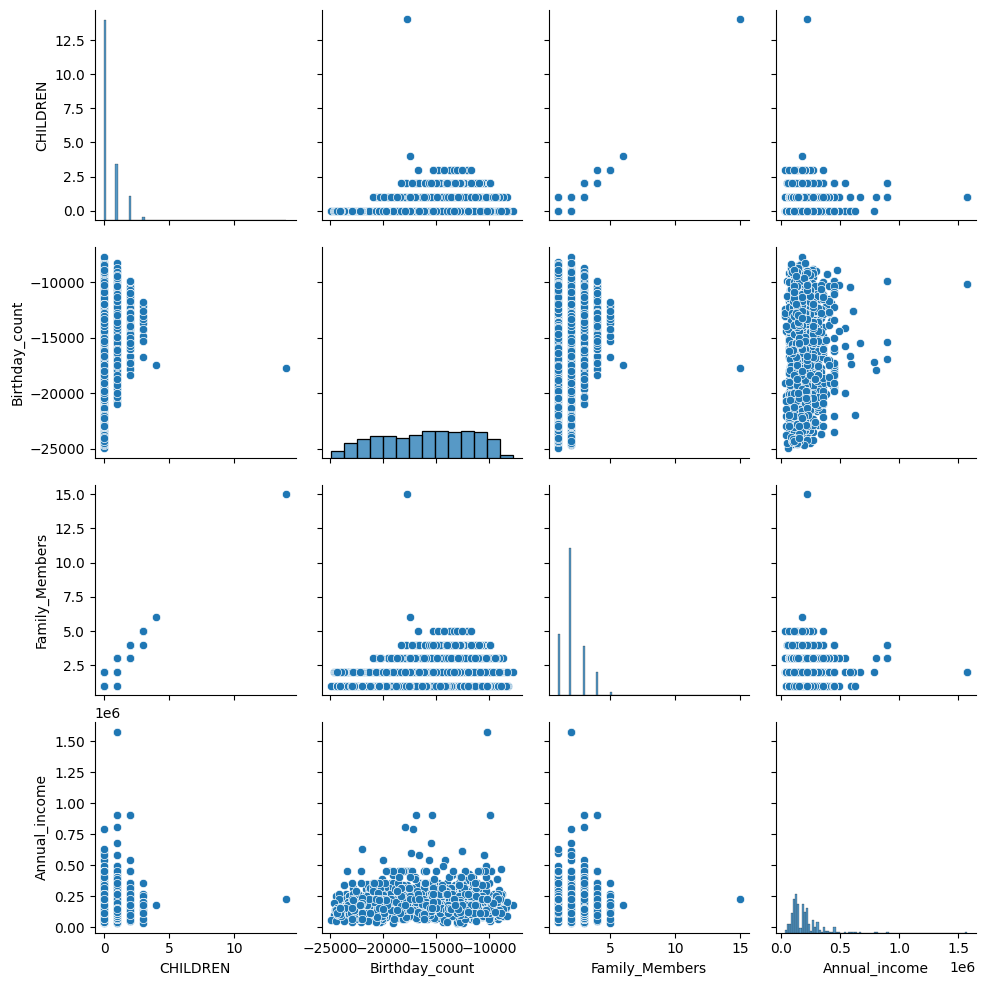

In [15]:
#plotting the features (EDA)

# Explore numerical features
sns.pairplot(card_df[['CHILDREN', 'Birthday_count', 'Family_Members','Annual_income']])
plt.show()

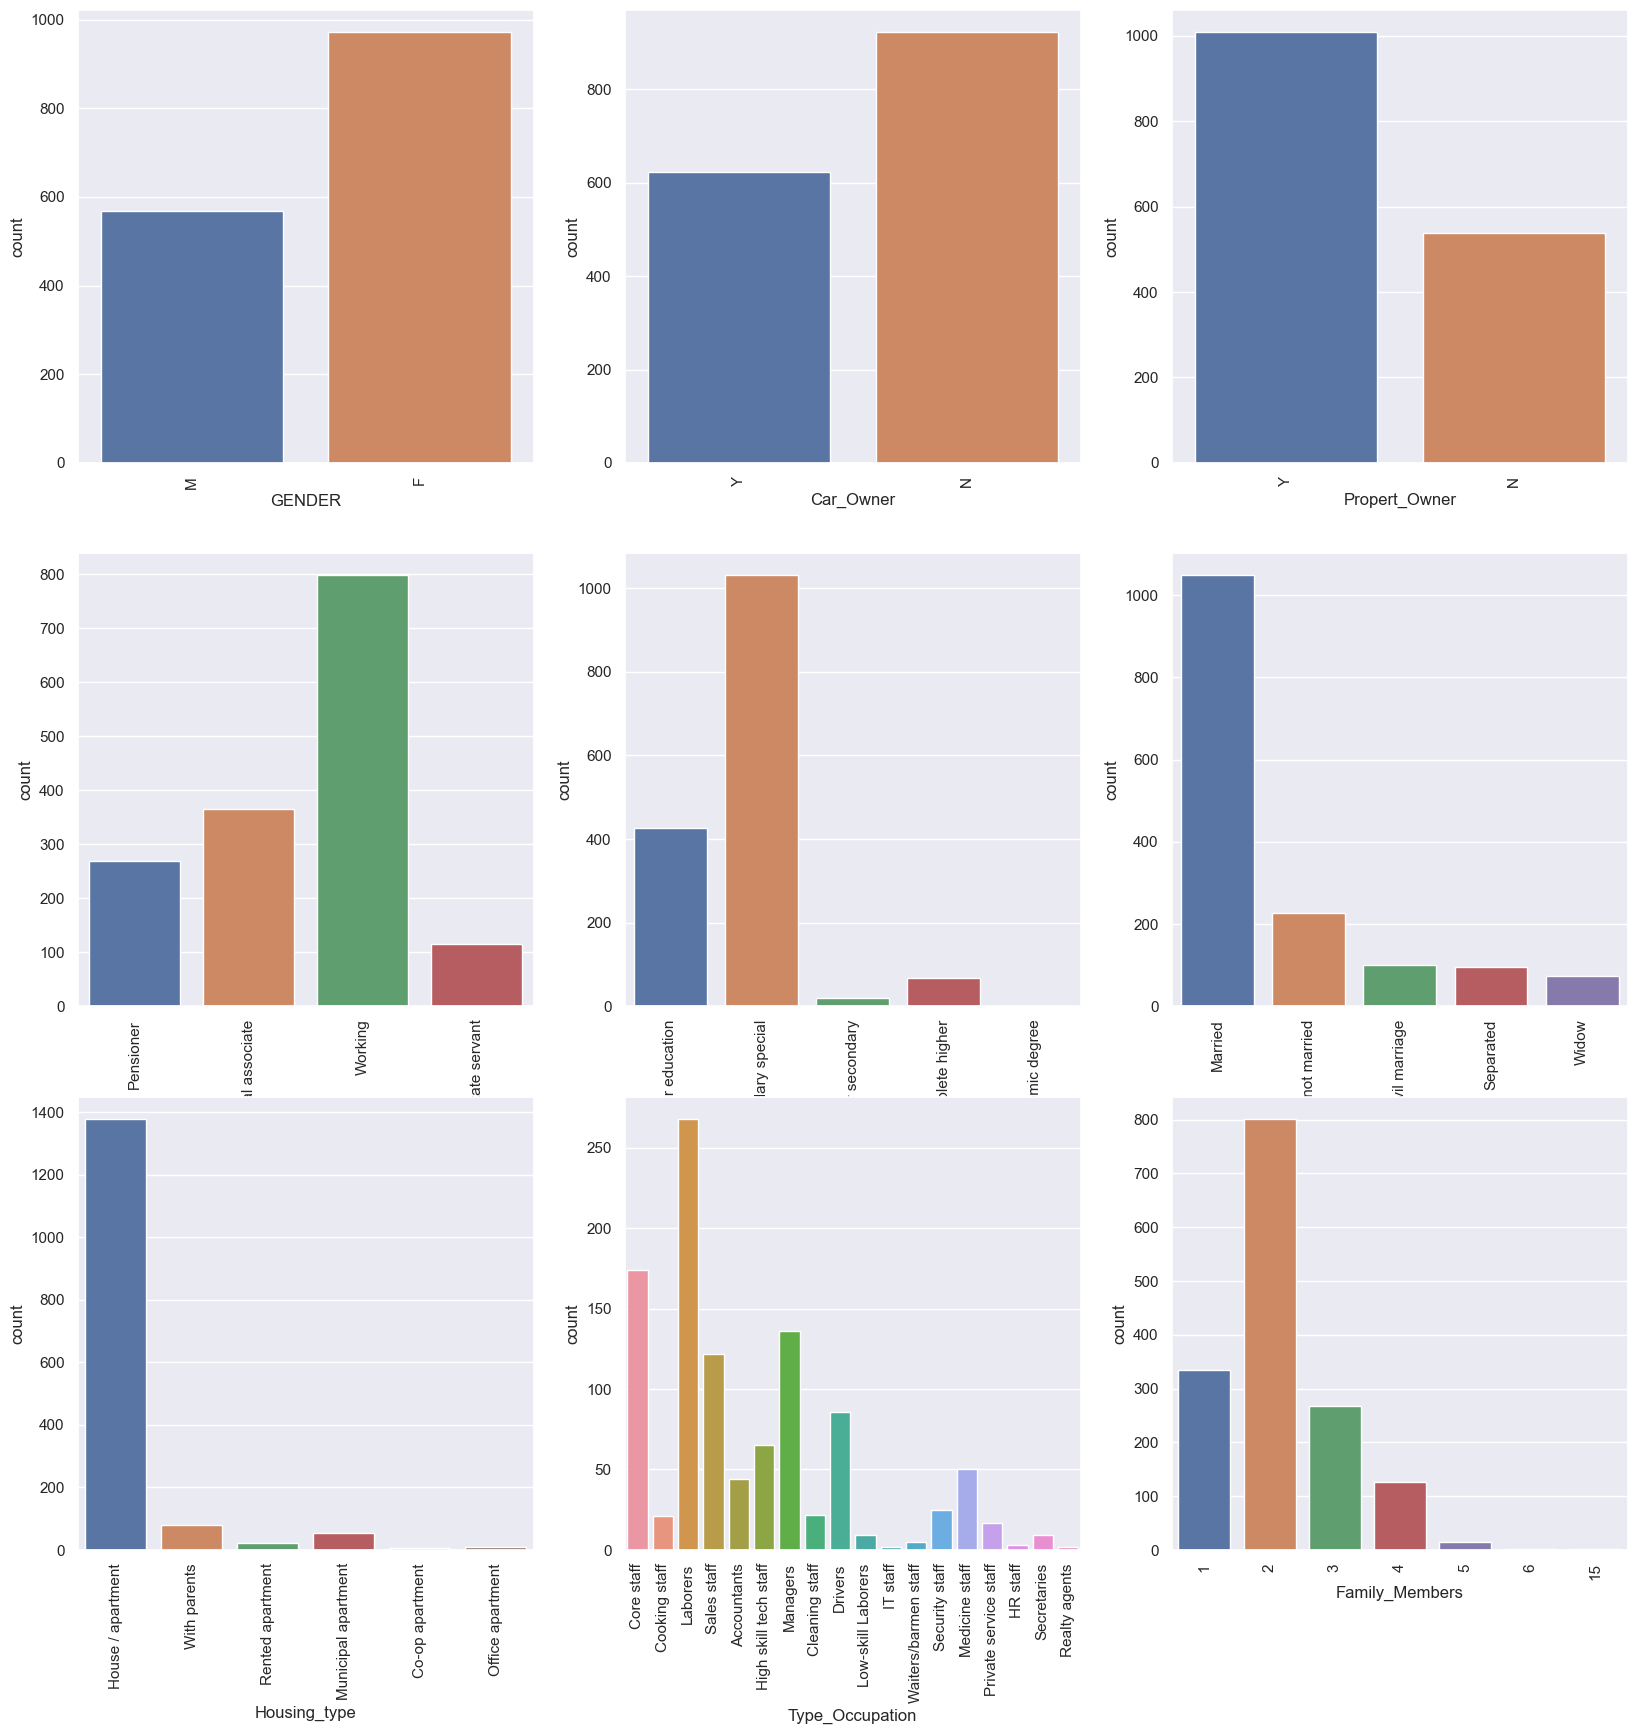

In [16]:
sns.set_theme(color_codes=True)
# Explore nominal features
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
sns.countplot(x='GENDER', data=card_df, ax=ax[0,0])
sns.countplot(x='Car_Owner', data=card_df, ax=ax[0,1])
sns.countplot(x='Propert_Owner', data=card_df, ax=ax[0,2])
sns.countplot(x='Type_Income', data=card_df, ax=ax[1,0])
sns.countplot(x='EDUCATION', data=card_df, ax=ax[1,1])
sns.countplot(x='Marital_status', data=card_df, ax=ax[1,2])
sns.countplot(x='Housing_type', data=card_df, ax=ax[2,0])
sns.countplot(x='Type_Occupation', data=card_df, ax=ax[2,1])
sns.countplot(x='Family_Members', data=card_df, ax=ax[2,2])

# Rotate x-axis labels by 90 degrees
for row in ax:
    for col in row:
        col.set_xticklabels(col.get_xticklabels(), rotation=90)

plt.show()

From the above graphs we can see the foolowing points:

  -  The count of female in the data is more than the male.
  -  We have less car owners then than the non car owners.
  -  Also the Property Owner are twicw than the customers without property.
  -  While the data mostly consist of people with Higher Education and secondary education   
  -  Also wew can see that the applicants are mostly married people and people who own a apartment

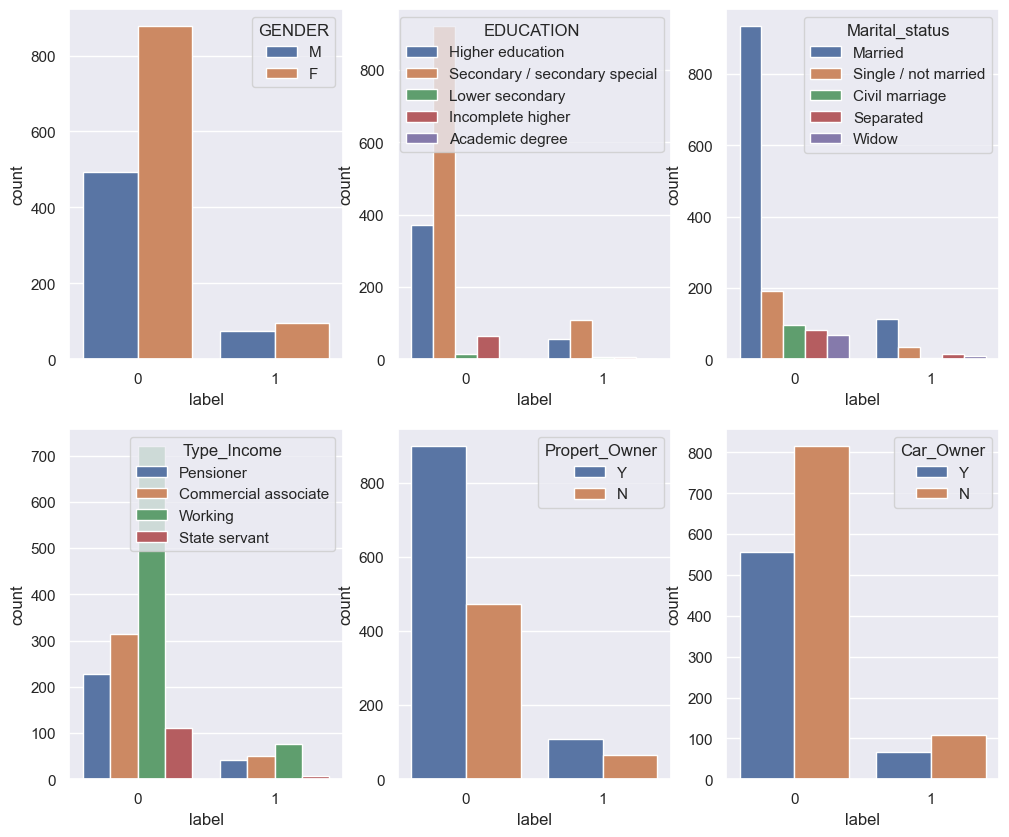

In [17]:
sns.set_theme(color_codes=True)
# Explore nominal features
fig, ax = plt.subplots(2, 3, figsize=(12, 10))


sns.countplot(x ='label', hue = "GENDER", data = card_df,ax=ax[0,0])
sns.countplot(x ='label', hue = "EDUCATION", data = card_df,ax=ax[0,1])
sns.countplot(x ='label', hue = "Marital_status", data = card_df,ax=ax[0,2])
sns.countplot(x ='label', hue = "Type_Income", data = card_df,ax=ax[1,0])
sns.countplot(x ='label', hue = "Propert_Owner", data = card_df,ax=ax[1,1])
sns.countplot(x ='label', hue = "Car_Owner", data = card_df,ax=ax[1,2])

plt.show()



Some of the notable observations from the above bar graph are as follows:
  - The credit card has been approved to people who are female or people with Higher education and are merried.
  - Also people in working class who own property have higher approval rate for a credit card.
  - While we can also see that people who own a car might have lesser chance for approval.

<Axes: xlabel='label', ylabel='count'>

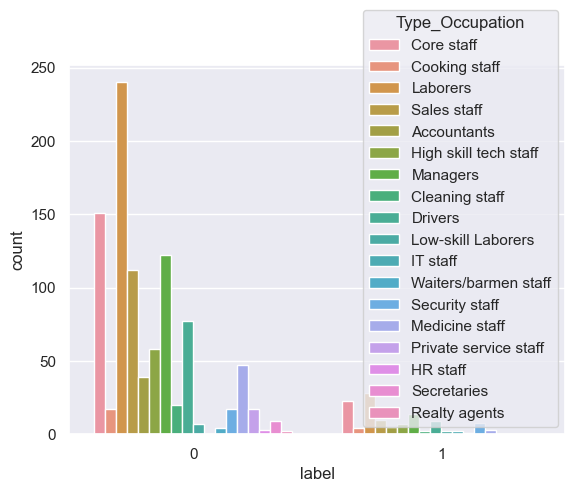

In [18]:
sns.set_theme(color_codes=True)
sns.countplot(x ='label', hue = "Type_Occupation", data = card_df)


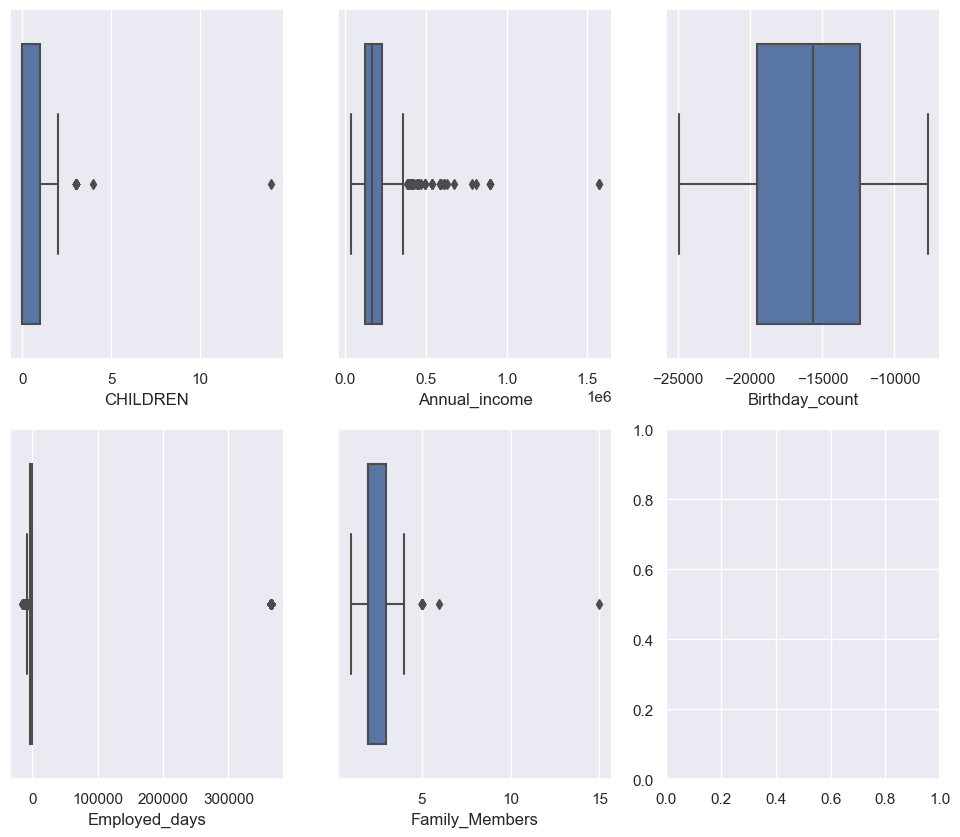

In [19]:
sns.set_theme(color_codes=True)
# Explore nominal features
fig, ax = plt.subplots(2, 3, figsize=(12, 10))
sns.boxplot(x='CHILDREN', data=card_df, ax=ax[0,0])
sns.boxplot(x='Annual_income', data=card_df, ax=ax[0,1])
sns.boxplot(x='Birthday_count', data=card_df, ax=ax[0,2])
sns.boxplot(x='Employed_days', data=card_df, ax=ax[1,0])
sns.boxplot(x='Family_Members', data=card_df, ax=ax[1,1])

plt.show()

As we can obeserve in the box plot there are some outliers in ou data such as the employed days, family members, Childrens and Annual Income

In [20]:
# Find the maximum value in the 'Employed_days' column
max_employed_days = card_df['Employed_days'].max()

# Filter the DataFrame to get all rows where 'Employed_days' is equal to the maximum value
rows_with_highest_employed_days = card_df[card_df['Employed_days'] == max_employed_days]

# Display the resulting DataFrame
print(rows_with_highest_employed_days)


       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
7     5009894      F         N             N         0       180000.0   
26    5024916      F         N             Y         0       112500.0   
27    5024917      F         N             Y         0            NaN   
31    5029311      F         N             Y         0       112500.0   
...       ...    ...       ...           ...       ...            ...   
1509  5024077      F         Y             Y         0       157500.0   
1511  5053535      F         N             Y         0       216000.0   
1514  5051097      F         N             N         0        69750.0   
1525  5023719      F         Y             Y         0       175500.0   
1531  5048642      F         N             N         0       157500.0   

     Type_Income                      EDUCATION        Marital_status  \
0      Pensioner               Higher education   

In [21]:
# Find the maximum value in the 'Employed_days' column
max_children = card_df['CHILDREN'].max()

# Filter the DataFrame to get all rows where 'Employed_days' is equal to the maximum value
rows_with_highest_children= card_df[card_df['CHILDREN'] == max_children]

# Display the resulting DataFrame
print(rows_with_highest_children)


      Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
565  5061207      M         Y             Y        14       225000.0   

    Type_Income                      EDUCATION Marital_status  \
565     Working  Secondary / secondary special      Separated   

          Housing_type  Birthday_count  Employed_days  Mobile_phone  \
565  House / apartment        -17754.0          -1689             1   

     Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  
565           0      0         0         Drivers              15      0  


In [22]:
# Find the maximum value in the 'Employed_days' column
max_children = card_df['Family_Members'].max()

# Filter the DataFrame to get all rows where 'Employed_days' is equal to the maximum value
rows_with_highest_children= card_df[card_df['Family_Members'] == max_children]

# Display the resulting DataFrame
print(rows_with_highest_children)


      Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
565  5061207      M         Y             Y        14       225000.0   

    Type_Income                      EDUCATION Marital_status  \
565     Working  Secondary / secondary special      Separated   

          Housing_type  Birthday_count  Employed_days  Mobile_phone  \
565  House / apartment        -17754.0          -1689             1   

     Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  
565           0      0         0         Drivers              15      0  


In [23]:
# Find the maximum value in the 'Employed_days' column
max_children = card_df['Annual_income'].max()

# Filter the DataFrame to get all rows where 'Employed_days' is equal to the maximum value
rows_with_highest_children= card_df[card_df['Annual_income'] == max_children]

# Display the resulting DataFrame
print(rows_with_highest_children)


      Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
211  5143231      F         Y             Y         1      1575000.0   
233  5143235      F         Y             Y         1      1575000.0   

              Type_Income         EDUCATION        Marital_status  \
211  Commercial associate  Higher education  Single / not married   
233  Commercial associate  Higher education  Single / not married   

          Housing_type  Birthday_count  Employed_days  Mobile_phone  \
211  House / apartment        -10142.0          -2479             1   
233  House / apartment        -10142.0          -2479             1   

     Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  
211           0      0         0        Managers               2      0  
233           0      0         0        Managers               2      0  


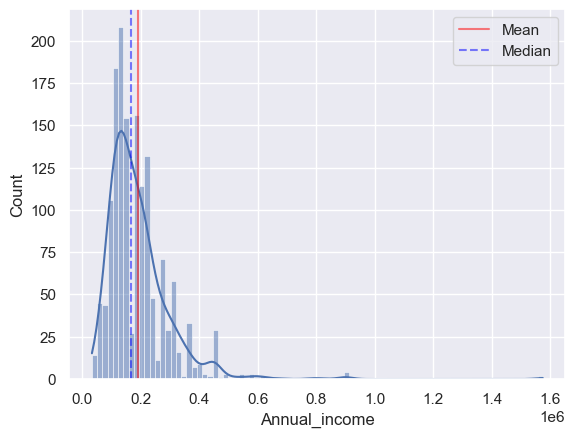

In [24]:
sns.set_theme(color_codes=True)
# Explore nominal features
sns.histplot(x='Annual_income', data=card_df, kde=True)
plt.axvline(x=card_df.Annual_income.mean(),color='red',alpha=0.5,label='Mean') # adding vartical line as mean
plt.axvline(x=card_df.Annual_income.median(),c='blue',ls='--',alpha=0.5,label='Median') # adding vartical line as median
plt.legend()
plt.show()

In [ ]:
The Data of the annual income shows that it is right skewed

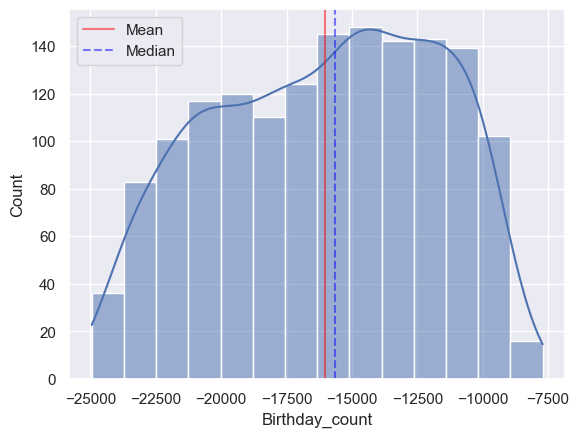

In [25]:
sns.set_theme(color_codes=True)
# Explore nominal features
sns.histplot(x='Birthday_count', data=card_df, kde=True)
plt.axvline(x=card_df.Birthday_count.mean(),color='red',alpha=0.5,label='Mean') # adding vartical line as mean
plt.axvline(x=card_df.Birthday_count.median(),c='blue',ls='--',alpha=0.5,label='Median') # adding vartical line as median
plt.legend()
plt.show()

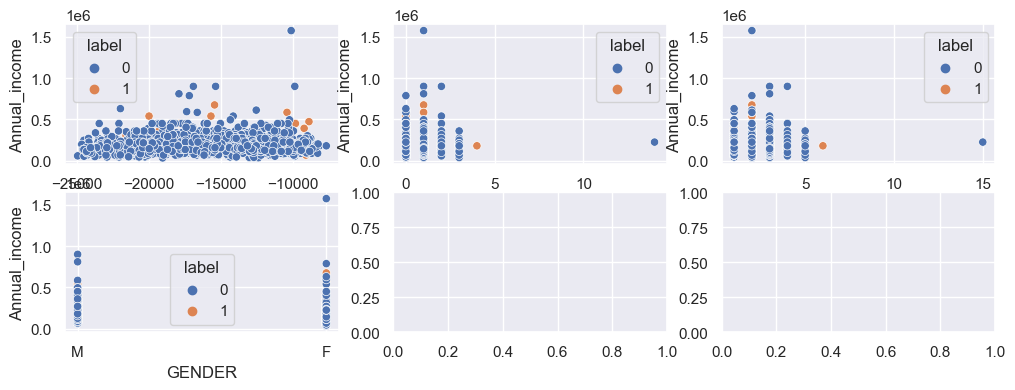

In [26]:
#Explore relationships between features
fig, ax = plt.subplots(2, 3, figsize=(12, 4))
sns.scatterplot(x='Birthday_count', y='Annual_income', hue='label', data=card_df, ax=ax[0,0])
sns.scatterplot(x='CHILDREN', y='Annual_income',hue='label', data=card_df, ax=ax[0,1])
sns.scatterplot(x='Family_Members', y='Annual_income',hue='label', data=card_df, ax=ax[0,2])

sns.scatterplot(x='GENDER', y='Annual_income',hue='label', data=card_df, ax=ax[1,0])

plt.show()

In [27]:
#card_df(

# Checking for missing values and working on duplicate rows and unwanted columns

* Checking the missing values

In [28]:

card_df.isnull().sum().sort_values(ascending=False)

Type_Occupation    488
Annual_income       23
Birthday_count      22
GENDER               7
Ind_ID               0
Employed_days        0
Family_Members       0
EMAIL_ID             0
Phone                0
Work_Phone           0
Mobile_phone         0
Housing_type         0
Marital_status       0
EDUCATION            0
Type_Income          0
CHILDREN             0
Propert_Owner        0
Car_Owner            0
label                0
dtype: int64

In [29]:
card_df.isnull().mean().sort_values(ascending=False) * 100

Type_Occupation    31.524548
Annual_income       1.485788
Birthday_count      1.421189
GENDER              0.452196
Ind_ID              0.000000
Employed_days       0.000000
Family_Members      0.000000
EMAIL_ID            0.000000
Phone               0.000000
Work_Phone          0.000000
Mobile_phone        0.000000
Housing_type        0.000000
Marital_status      0.000000
EDUCATION           0.000000
Type_Income         0.000000
CHILDREN            0.000000
Propert_Owner       0.000000
Car_Owner           0.000000
label               0.000000
dtype: float64

In [30]:
import missingno as msno # library to examine missing values

<Axes: >

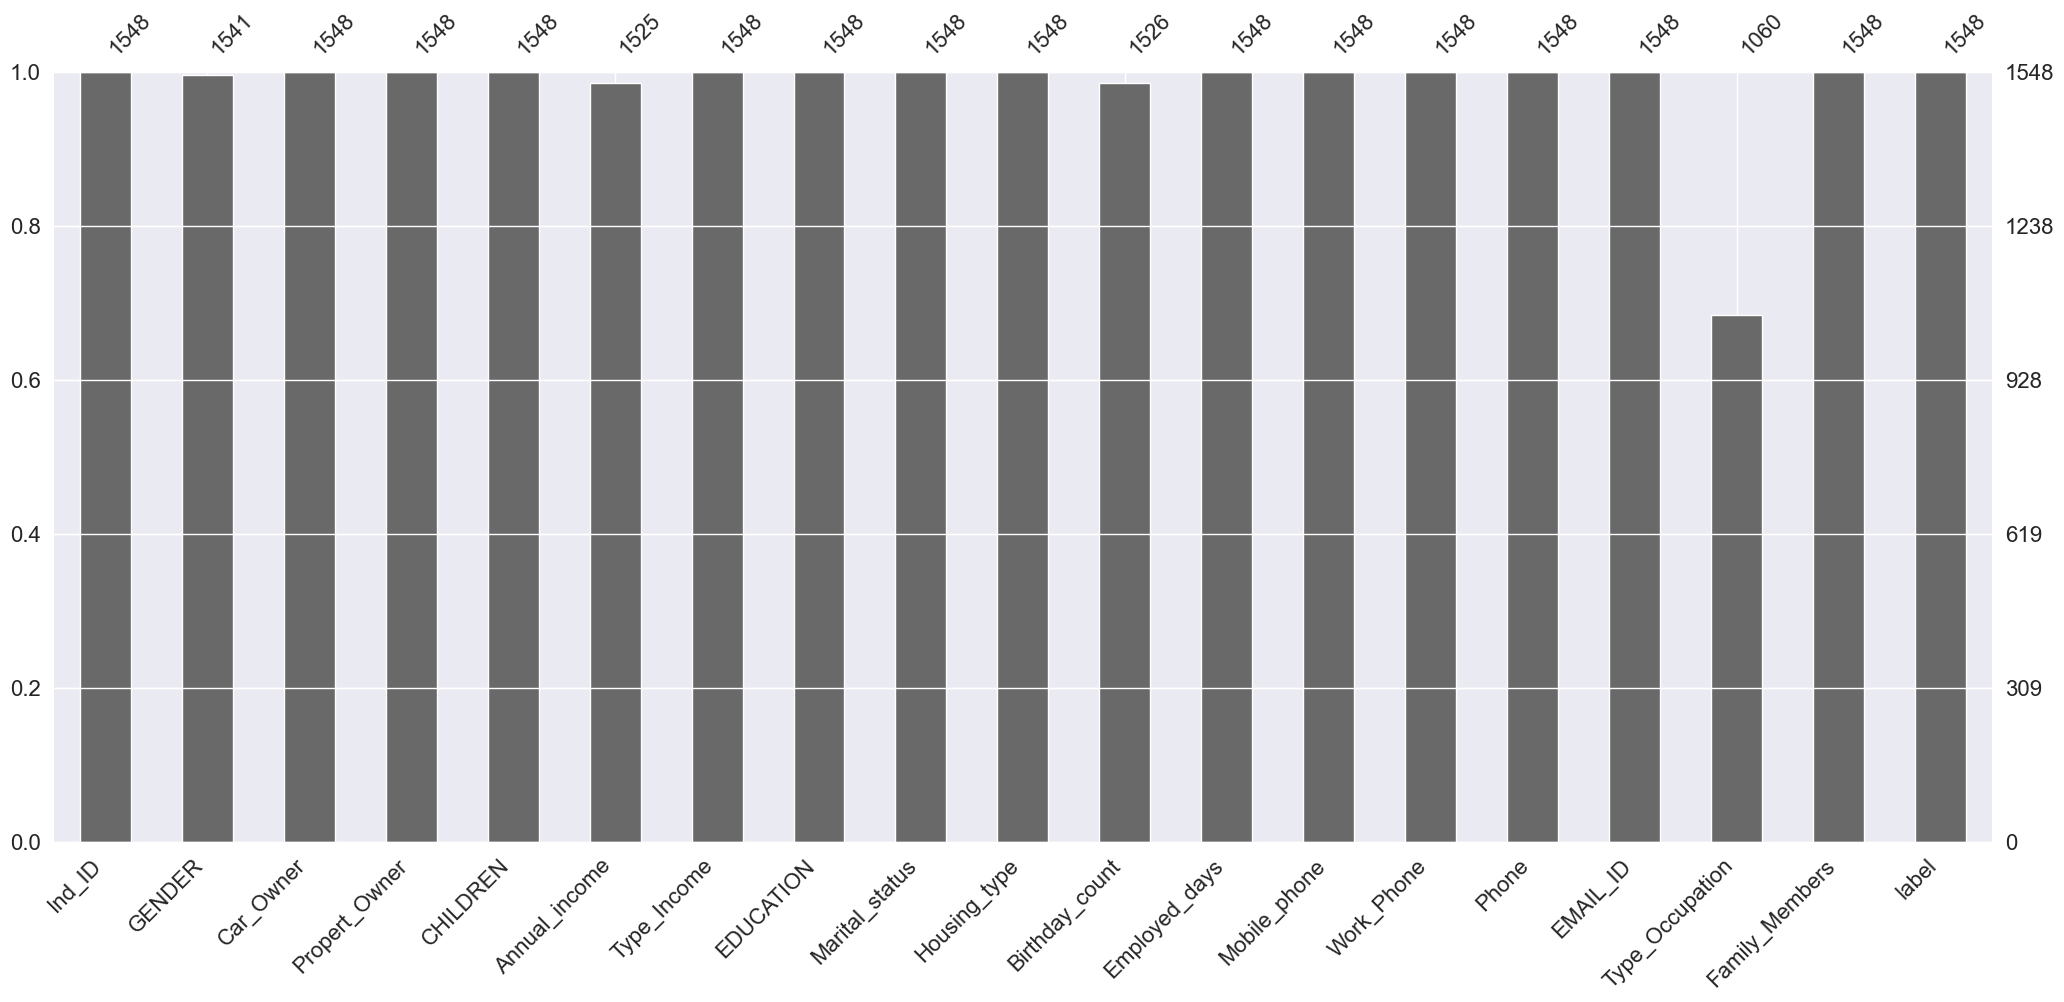

In [31]:
msno.bar(card_df)

<Axes: >

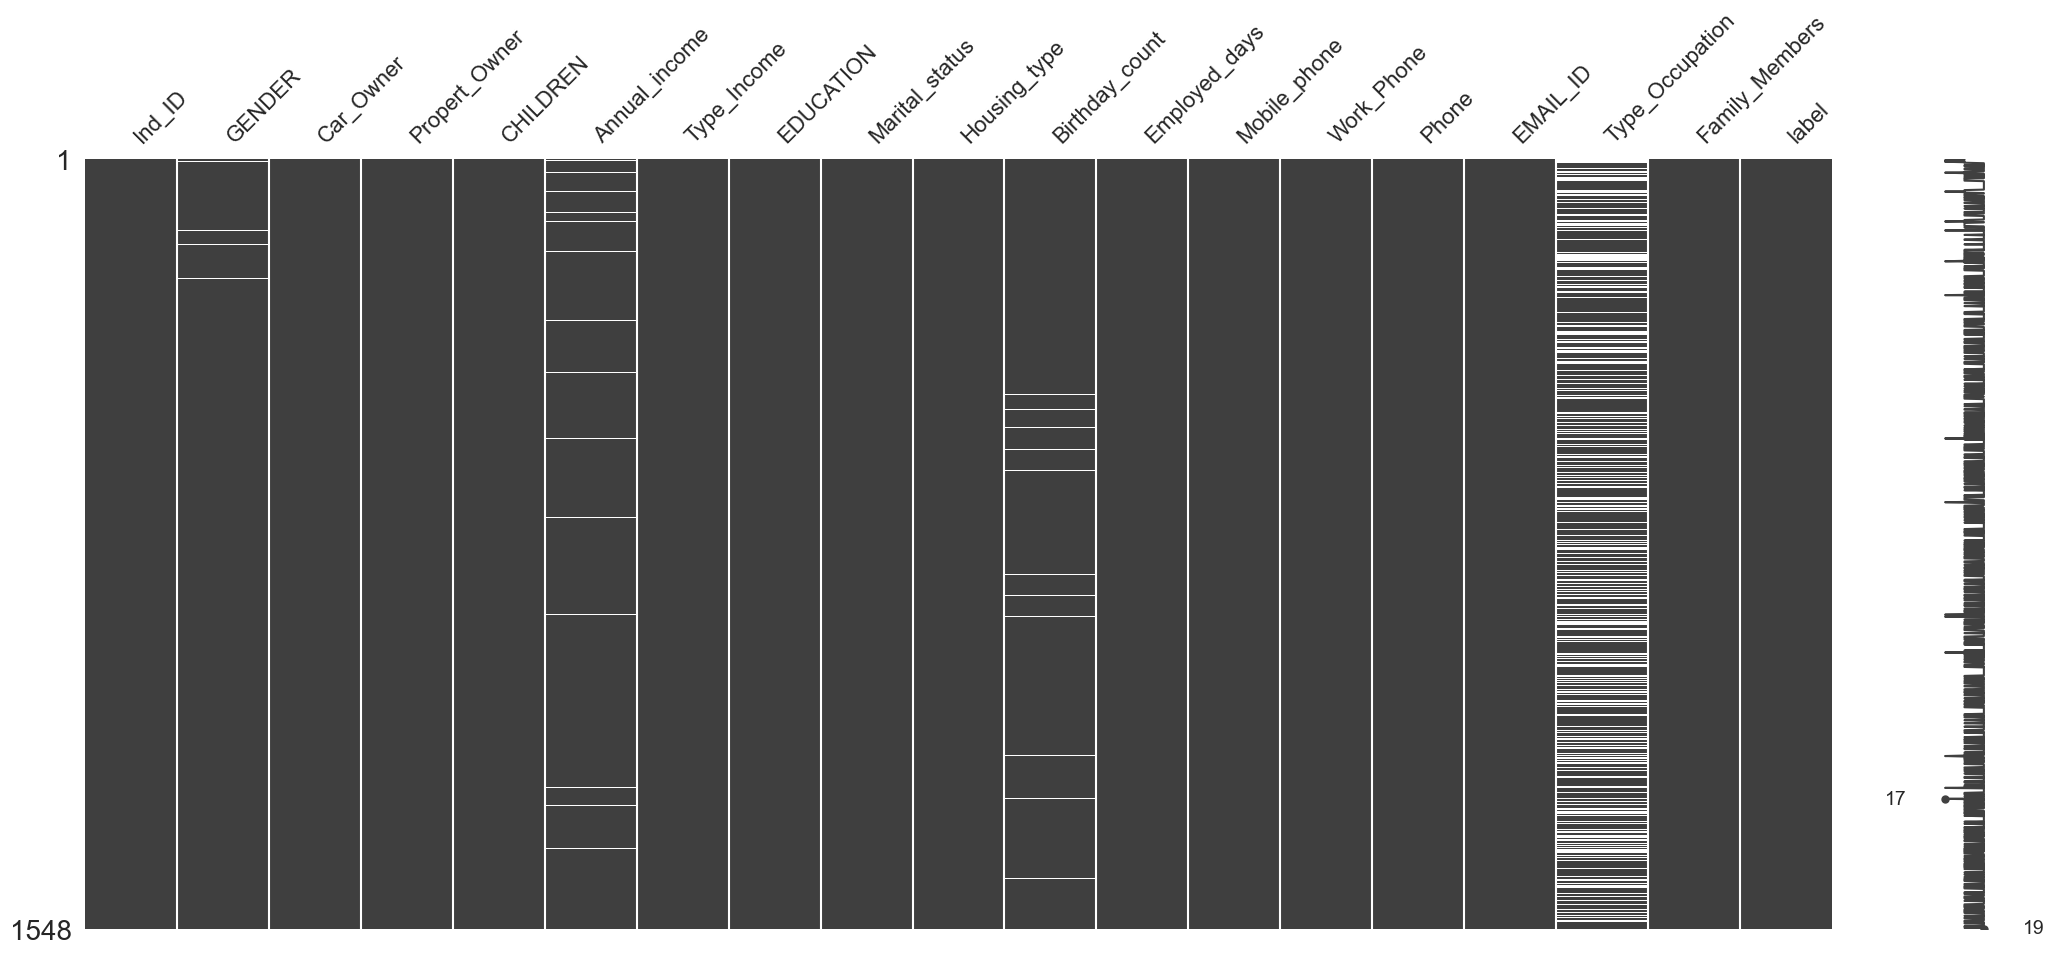

In [32]:
msno.matrix(card_df) # checking if any pattern in missing values


there seems to be no pattern in missingness of the columns

<Axes: >

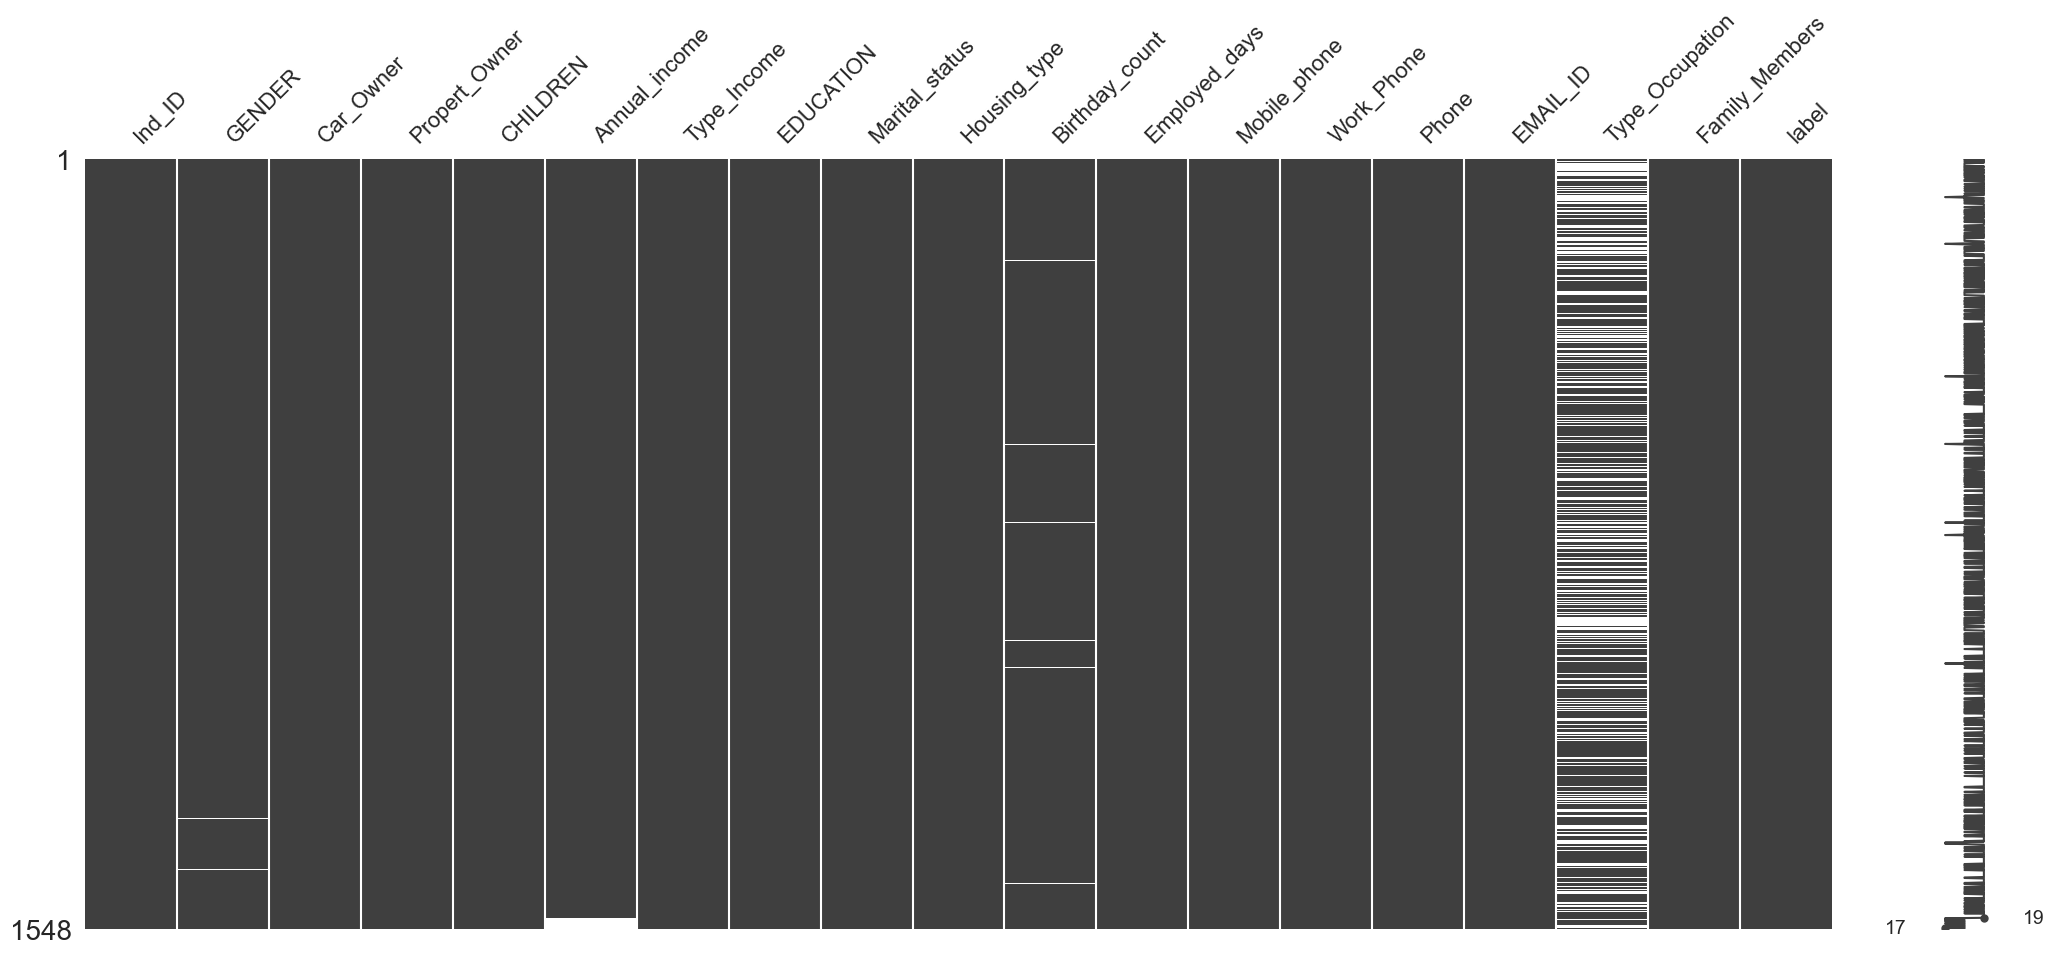

In [33]:
sorted = card_df.sort_values('Annual_income') # sorting values based on age
msno.matrix(sorted)

<Axes: >

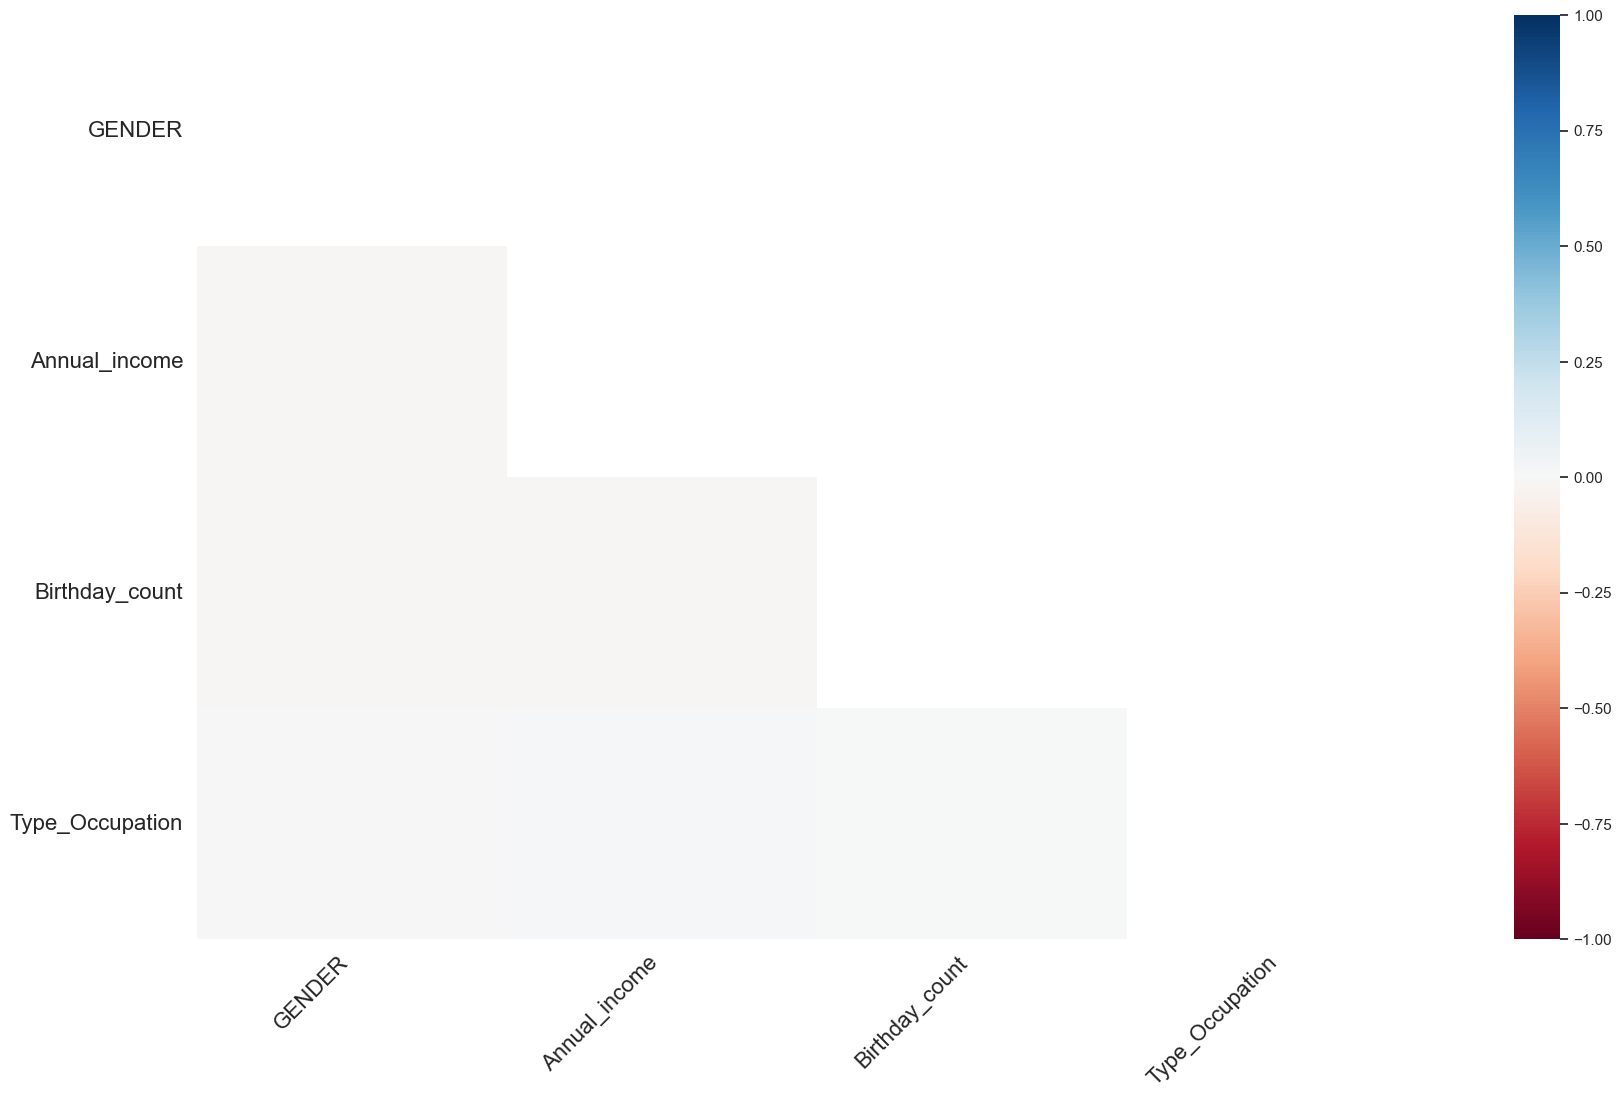

In [34]:
msno.heatmap(card_df) # creating heatmap on correaltion to check missingness

There seems to be no relation between the missing values on basis of heatmap and matrix

In [35]:
card_df.duplicated().sum()

0

In [36]:
card_df.shape

(1548, 19)

In [37]:
# There seems to be no duplicate values in our data

In [38]:
card_df.drop(['Mobile_phone','Work_Phone'],inplace=True,axis=1)
#Dropping the mobile_phone,'Work_Phone' as it has only one unique value which will not provide any insight to our output

In [39]:
card_df.shape

(1548, 17)

In [40]:
card_df.dropna(subset=['GENDER'], inplace=True)
# Dropping null values from gender as it is only 0.45% of the total value

In [41]:
card_df.shape

(1541, 17)

In [42]:
card_df.isnull().sum().sort_values(ascending=False)

Type_Occupation    486
Annual_income       23
Birthday_count      22
Ind_ID               0
Housing_type         0
Family_Members       0
EMAIL_ID             0
Phone                0
Employed_days        0
Marital_status       0
GENDER               0
EDUCATION            0
Type_Income          0
CHILDREN             0
Propert_Owner        0
Car_Owner            0
label                0
dtype: int64

In [43]:
card_df.tail(20)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1528,5033520,F,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12559.0,-5862,1,0,Medicine staff,5,0
1529,5028612,M,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,-10681.0,-2152,1,0,Sales staff,1,0
1530,5089954,M,N,Y,1,126000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-12755.0,-2105,0,0,NaN,3,0
1531,5048642,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-24048.0,365243,0,0,NaN,1,0
1532,5125261,M,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-15423.0,-1200,1,0,NaN,2,0
1533,5100133,M,Y,Y,2,270000.0,Commercial associate,Higher education,Married,House / apartment,-13955.0,-1891,0,0,Drivers,4,0
1534,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17975.0,-3476,0,0,Drivers,2,0
1535,5089719,F,N,N,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,-19984.0,-4662,1,0,NaN,2,0
1536,5033447,F,Y,N,0,112500.0,Commercial associate,Higher education,Married,House / apartment,-10828.0,-657,0,0,Core staff,2,0
1537,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13336.0,-1436,0,0,Low-skill Laborers,2,0


In [44]:
card_df.shape

(1541, 17)

### encoding categorical values

ordinal encoding in ordinal  categorical datas with heirarchy

In [45]:
card_df['EDUCATION'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [46]:
# Defining the mapping dictionary for ordinal encoding
edn_mapping = {'Higher education':1, 'Secondary / secondary special':2,
       'Lower secondary':3, 'Incomplete higher':4, 'Academic degree':5}
card_df.head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,0,NaN,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,0,NaN,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,0,0,NaN,2,1
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,1,Core staff,3,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,1,Core staff,3,1
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,1,Core staff,1,1


In [47]:
card_df["education_ordinal"] = card_df['EDUCATION'].map(edn_mapping) # Created new column 'EDUCATION_Numerical' with numerical values
card_df.drop(columns=['EDUCATION'], inplace=True) # dropping the original column
card_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Marital_status,Housing_type,Birthday_count,Employed_days,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,education_ordinal
0,5008827,M,Y,Y,0,180000.0,Pensioner,Married,House / apartment,-18772.0,365243,0,0,NaN,2,1,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Married,House / apartment,-13557.0,-586,1,0,NaN,2,1,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Married,House / apartment,NaN,-586,1,0,NaN,2,1,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Married,House / apartment,-13557.0,-586,1,0,NaN,2,1,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Married,House / apartment,-13557.0,-586,1,0,NaN,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Married,House / apartment,-11957.0,-2182,0,0,Managers,2,0,1
1544,5023655,F,N,N,0,225000.0,Commercial associate,Single / not married,House / apartment,-10229.0,-1209,0,0,Accountants,1,0,4
1545,5115992,M,Y,Y,2,180000.0,Working,Married,House / apartment,-13174.0,-2477,0,0,Managers,4,0,1
1546,5118219,M,Y,N,0,270000.0,Working,Civil marriage,House / apartment,-15292.0,-645,1,0,Drivers,2,0,2


In [48]:
card_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Marital_status,Housing_type,Birthday_count,Employed_days,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,education_ordinal
0,5008827,M,Y,Y,0,180000.0,Pensioner,Married,House / apartment,-18772.0,365243,0,0,NaN,2,1,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Married,House / apartment,-13557.0,-586,1,0,NaN,2,1,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Married,House / apartment,NaN,-586,1,0,NaN,2,1,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Married,House / apartment,-13557.0,-586,1,0,NaN,2,1,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Married,House / apartment,-13557.0,-586,1,0,NaN,2,1,1


In [49]:
print(card_df['GENDER'].count()) 
print(card_df['Car_Owner'].count())
print(card_df['Propert_Owner'].count())
print(card_df['Type_Income'].count())
print(card_df['Marital_status'].count())
print(card_df['Housing_type'].count())


1541
1541
1541
1541
1541
1541


In [50]:
card_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'Marital_status', 'Housing_type',
       'Birthday_count', 'Employed_days', 'Phone', 'EMAIL_ID',
       'Type_Occupation', 'Family_Members', 'label', 'education_ordinal'],
      dtype='object')

In [51]:
card_df.shape

(1541, 17)

In [52]:
card_df.isnull().sum().sort_values(ascending=False)

Type_Occupation      486
Annual_income         23
Birthday_count        22
Ind_ID                 0
label                  0
Family_Members         0
EMAIL_ID               0
Phone                  0
Employed_days          0
Housing_type           0
GENDER                 0
Marital_status         0
Type_Income            0
CHILDREN               0
Propert_Owner          0
Car_Owner              0
education_ordinal      0
dtype: int64

In [53]:
cols_to_encode = ['GENDER','Car_Owner','Propert_Owner','Type_Income','Marital_status','Housing_type']

card_df_encoded = pd.get_dummies(card_df, columns=cols_to_encode, drop_first=True)


In [54]:
card_df_encoded.head(10)


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,...,Type_Income_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,5008827,0,180000.0,-18772.0,365243,0,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
1,5009744,0,315000.0,-13557.0,-586,1,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
2,5009746,0,315000.0,NaN,-586,1,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
3,5009749,0,NaN,-13557.0,-586,1,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
4,5009752,0,315000.0,-13557.0,-586,1,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
6,5009754,0,315000.0,-13557.0,-586,1,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
7,5009894,0,180000.0,-22134.0,365243,0,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
8,5010864,1,450000.0,-18173.0,-678,1,1,Core staff,3,1,...,False,True,False,False,False,True,False,False,False,False
9,5010868,1,450000.0,-18173.0,-678,1,1,Core staff,3,1,...,False,True,False,False,False,True,False,False,False,False
10,5010869,1,450000.0,-18173.0,-678,1,1,Core staff,1,1,...,False,False,False,True,False,True,False,False,False,False


In [55]:
card_df_encoded.tail(10)


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,...,Type_Income_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
1538,5125816,0,450000.0,-19783.0,-5521,1,0,Managers,2,0,...,False,True,False,False,False,True,False,False,False,False
1539,5149946,0,180000.0,-22228.0,-686,1,0,High skill tech staff,2,0,...,True,True,False,False,False,True,False,False,False,False
1540,5024049,1,144000.0,-12903.0,-2924,0,0,Accountants,3,0,...,True,True,False,False,False,True,False,False,False,False
1541,5117065,2,225000.0,NaN,-1648,1,0,Accountants,4,0,...,True,True,False,False,False,True,False,False,False,False
1542,5118268,1,360000.0,-11294.0,-3536,1,0,Drivers,3,0,...,False,True,False,False,False,True,False,False,False,False
1543,5028645,0,NaN,-11957.0,-2182,0,0,Managers,2,0,...,False,True,False,False,False,True,False,False,False,False
1544,5023655,0,225000.0,-10229.0,-1209,0,0,Accountants,1,0,...,False,False,False,True,False,True,False,False,False,False
1545,5115992,2,180000.0,-13174.0,-2477,0,0,Managers,4,0,...,True,True,False,False,False,True,False,False,False,False
1546,5118219,0,270000.0,-15292.0,-645,1,0,Drivers,2,0,...,True,False,False,False,False,True,False,False,False,False
1547,5053790,0,225000.0,-16601.0,-2859,0,0,NaN,2,0,...,True,True,False,False,False,True,False,False,False,False


In [56]:
card_df_encoded.isnull().sum().sort_values(ascending=False)

Type_Occupation                        486
Annual_income                           23
Birthday_count                          22
Ind_ID                                   0
Type_Income_State servant                0
Housing_type_Rented apartment            0
Housing_type_Office apartment            0
Housing_type_Municipal apartment         0
Housing_type_House / apartment           0
Marital_status_Widow                     0
Marital_status_Single / not married      0
Marital_status_Separated                 0
Marital_status_Married                   0
Type_Income_Working                      0
Propert_Owner_Y                          0
Type_Income_Pensioner                    0
CHILDREN                                 0
Car_Owner_Y                              0
GENDER_M                                 0
education_ordinal                        0
label                                    0
Family_Members                           0
EMAIL_ID                                 0
Phone      

In [57]:
card_df_encoded.shape

(1541, 26)

In [58]:
card_df= card_df_encoded

In [59]:
card_df.head(20)

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,...,Type_Income_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,5008827,0,180000.0,-18772.0,365243,0,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
1,5009744,0,315000.0,-13557.0,-586,1,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
2,5009746,0,315000.0,NaN,-586,1,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
3,5009749,0,NaN,-13557.0,-586,1,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
4,5009752,0,315000.0,-13557.0,-586,1,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
6,5009754,0,315000.0,-13557.0,-586,1,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
7,5009894,0,180000.0,-22134.0,365243,0,0,NaN,2,1,...,False,True,False,False,False,True,False,False,False,False
8,5010864,1,450000.0,-18173.0,-678,1,1,Core staff,3,1,...,False,True,False,False,False,True,False,False,False,False
9,5010868,1,450000.0,-18173.0,-678,1,1,Core staff,3,1,...,False,True,False,False,False,True,False,False,False,False
10,5010869,1,450000.0,-18173.0,-678,1,1,Core staff,1,1,...,False,False,False,True,False,True,False,False,False,False


In [60]:
card_df.tail(20)

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,...,Type_Income_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
1528,5033520,3,180000.0,-12559.0,-5862,1,0,Medicine staff,5,0,...,True,True,False,False,False,False,True,False,False,False
1529,5028612,0,225000.0,-10681.0,-2152,1,0,Sales staff,1,0,...,False,False,False,True,False,False,False,False,False,True
1530,5089954,1,126000.0,-12755.0,-2105,0,0,NaN,3,0,...,False,False,False,False,False,True,False,False,False,False
1531,5048642,0,157500.0,-24048.0,365243,0,0,NaN,1,0,...,False,False,True,False,False,True,False,False,False,False
1532,5125261,0,157500.0,-15423.0,-1200,1,0,NaN,2,0,...,False,True,False,False,False,True,False,False,False,False
1533,5100133,2,270000.0,-13955.0,-1891,0,0,Drivers,4,0,...,False,True,False,False,False,True,False,False,False,False
1534,5096856,0,180000.0,-17975.0,-3476,0,0,Drivers,2,0,...,False,True,False,False,False,True,False,False,False,False
1535,5089719,0,144000.0,-19984.0,-4662,1,0,NaN,2,0,...,True,True,False,False,False,True,False,False,False,False
1536,5033447,0,112500.0,-10828.0,-657,0,0,Core staff,2,0,...,False,True,False,False,False,True,False,False,False,False
1537,5090942,0,225000.0,-13336.0,-1436,0,0,Low-skill Laborers,2,0,...,False,True,False,False,False,True,False,False,False,False


In [61]:
card_df['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'Managers', 'Cleaning staff', 'Drivers',
       'Low-skill Laborers', 'High skill tech staff', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [62]:
card_df.shape

(1541, 26)

In [63]:
card_df.isnull().sum().sort_values(ascending=False)

Type_Occupation                        486
Annual_income                           23
Birthday_count                          22
Ind_ID                                   0
Type_Income_State servant                0
Housing_type_Rented apartment            0
Housing_type_Office apartment            0
Housing_type_Municipal apartment         0
Housing_type_House / apartment           0
Marital_status_Widow                     0
Marital_status_Single / not married      0
Marital_status_Separated                 0
Marital_status_Married                   0
Type_Income_Working                      0
Propert_Owner_Y                          0
Type_Income_Pensioner                    0
CHILDREN                                 0
Car_Owner_Y                              0
GENDER_M                                 0
education_ordinal                        0
label                                    0
Family_Members                           0
EMAIL_ID                                 0
Phone      

In [64]:
card_df['Type_Occupation'].fillna('Other',inplace=True)

In [65]:
card_df['Type_Occupation'].unique()

array(['Other', 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'Managers', 'Cleaning staff', 'Drivers',
       'Low-skill Laborers', 'High skill tech staff', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [66]:
# Define the occupation mapping dictionary
occupation_mapping = {
'Other':'Other',
'Core staff':'Highly_skilled',
'Cooking staff':'Skilled',
'Laborers':'Low_skilled',
'Sales staff':'Skilled',
'Accountants':'Highly_skilled',
'High skill tech staff':'Highly_skilled',
'Managers':'Highly_skilled',
'Cleaning staff':'Low_skilled',
'Drivers':'Low_skilled',
'Low-skill Laborers':'Low_skilled',
'IT staff':'Highly_skilled',
'Waiters/barmen staff':'Low_skilled',
'Security staff':'Low_skilled',
'Medicine staff':'Highly_skilled',
'Private service staff':'Skilled',
'HR staff':'Highly_skilled',
'Secretaries':'Highly_skilled',
'Realty agents':'Skilled'
}

# Creating the new 'Occupation_Category' column
card_df['Occupation_Category'] = card_df['Type_Occupation'].map(occupation_mapping)

# Drop the original 'Type_Occupation' column
card_df.drop(columns=['Type_Occupation'], inplace=True)

# Display the resulting DataFrame
print(card_df)


       Ind_ID  CHILDREN  Annual_income  Birthday_count  Employed_days  Phone  \
0     5008827         0       180000.0        -18772.0         365243      0   
1     5009744         0       315000.0        -13557.0           -586      1   
2     5009746         0       315000.0             NaN           -586      1   
3     5009749         0            NaN        -13557.0           -586      1   
4     5009752         0       315000.0        -13557.0           -586      1   
...       ...       ...            ...             ...            ...    ...   
1543  5028645         0            NaN        -11957.0          -2182      0   
1544  5023655         0       225000.0        -10229.0          -1209      0   
1545  5115992         2       180000.0        -13174.0          -2477      0   
1546  5118219         0       270000.0        -15292.0           -645      1   
1547  5053790         0       225000.0        -16601.0          -2859      0   

      EMAIL_ID  Family_Members  label  

In [67]:
card_df['Occupation_Category'].unique()

array(['Other', 'Highly_skilled', 'Skilled', 'Low_skilled'], dtype=object)

In [68]:
# Defining the mapping dictionary for ordinal encoding
skill_mapping = {'Highly_skilled':1, 'Skilled':2,
       'Low_skilled':3, 'Other':4}


In [69]:
card_df["occupation_ordinal"] = card_df['Occupation_Category'].map(skill_mapping) # Created new column 'EDUCATION_Numerical' with numerical values
card_df.drop(columns=['Occupation_Category'], inplace=True) # dropping the original column
card_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Family_Members,label,education_ordinal,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,occupation_ordinal
0,5008827,0,180000.0,-18772.0,365243,0,0,2,1,1,...,True,False,False,False,True,False,False,False,False,4
1,5009744,0,315000.0,-13557.0,-586,1,0,2,1,1,...,True,False,False,False,True,False,False,False,False,4
2,5009746,0,315000.0,NaN,-586,1,0,2,1,1,...,True,False,False,False,True,False,False,False,False,4
3,5009749,0,NaN,-13557.0,-586,1,0,2,1,1,...,True,False,False,False,True,False,False,False,False,4
4,5009752,0,315000.0,-13557.0,-586,1,0,2,1,1,...,True,False,False,False,True,False,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,NaN,-11957.0,-2182,0,0,2,0,1,...,True,False,False,False,True,False,False,False,False,1
1544,5023655,0,225000.0,-10229.0,-1209,0,0,1,0,4,...,False,False,True,False,True,False,False,False,False,1
1545,5115992,2,180000.0,-13174.0,-2477,0,0,4,0,1,...,True,False,False,False,True,False,False,False,False,1
1546,5118219,0,270000.0,-15292.0,-645,1,0,2,0,2,...,False,False,False,False,True,False,False,False,False,3


In [70]:
card_df.isnull().sum().sort_values(ascending=False)

Annual_income                          23
Birthday_count                         22
Ind_ID                                  0
Type_Income_State servant               0
Housing_type_With parents               0
Housing_type_Rented apartment           0
Housing_type_Office apartment           0
Housing_type_Municipal apartment        0
Housing_type_House / apartment          0
Marital_status_Widow                    0
Marital_status_Single / not married     0
Marital_status_Separated                0
Marital_status_Married                  0
Type_Income_Working                     0
Type_Income_Pensioner                   0
CHILDREN                                0
Propert_Owner_Y                         0
Car_Owner_Y                             0
GENDER_M                                0
education_ordinal                       0
label                                   0
Family_Members                          0
EMAIL_ID                                0
Phone                             

In [71]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1547
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ind_ID                               1541 non-null   int64  
 1   CHILDREN                             1541 non-null   int64  
 2   Annual_income                        1518 non-null   float64
 3   Birthday_count                       1519 non-null   float64
 4   Employed_days                        1541 non-null   int64  
 5   Phone                                1541 non-null   int64  
 6   EMAIL_ID                             1541 non-null   int64  
 7   Family_Members                       1541 non-null   int64  
 8   label                                1541 non-null   int64  
 9   education_ordinal                    1541 non-null   int64  
 10  GENDER_M                             1541 non-null   bool   
 11  Car_Owner_Y                        

### Treating missing values

In [72]:
card_df.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Phone', 'EMAIL_ID', 'Family_Members', 'label',
       'education_ordinal', 'GENDER_M', 'Car_Owner_Y', 'Propert_Owner_Y',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'occupation_ordinal'],
      dtype='object')

In [73]:
card_df.isnull().sum().sort_values(ascending=False)

Annual_income                          23
Birthday_count                         22
Ind_ID                                  0
Type_Income_State servant               0
Housing_type_With parents               0
Housing_type_Rented apartment           0
Housing_type_Office apartment           0
Housing_type_Municipal apartment        0
Housing_type_House / apartment          0
Marital_status_Widow                    0
Marital_status_Single / not married     0
Marital_status_Separated                0
Marital_status_Married                  0
Type_Income_Working                     0
Type_Income_Pensioner                   0
CHILDREN                                0
Propert_Owner_Y                         0
Car_Owner_Y                             0
GENDER_M                                0
education_ordinal                       0
label                                   0
Family_Members                          0
EMAIL_ID                                0
Phone                             

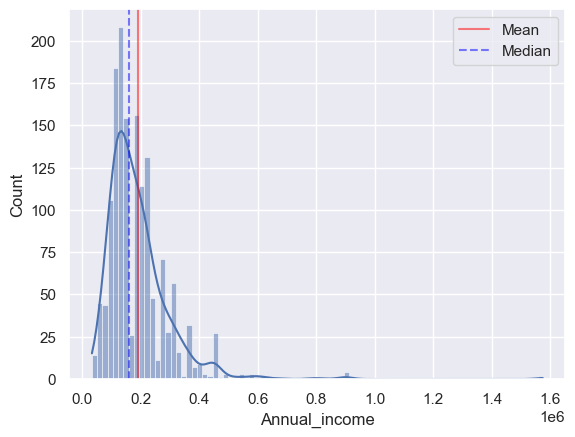

In [74]:
sns.histplot(data = card_df['Annual_income'], kde = True) # creating histogram with density plot
plt.axvline(x=card_df.Annual_income.mean(),color='red',alpha=0.5,label='Mean') # adding vartical line as mean
plt.axvline(x=card_df.Annual_income.median(),c='blue',ls='--',alpha=0.5,label='Median') # adding vartical line as median
plt.legend() # adding legend

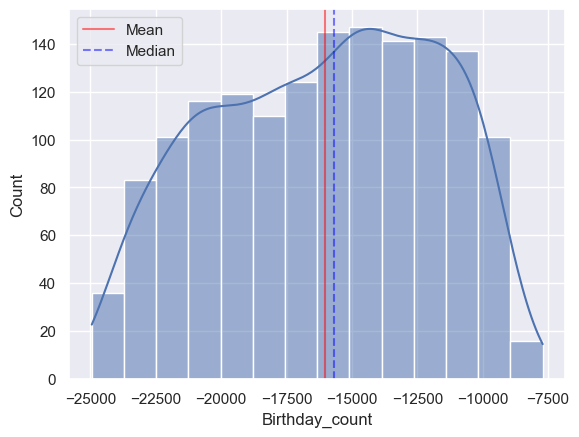

In [75]:
sns.histplot(data = card_df['Birthday_count'], kde = True) # creating histogram with desnity plot
plt.axvline(x=card_df.Birthday_count.mean(),color='red',alpha=0.5,label='Mean') # adding vartical line as mean
plt.axvline(x=card_df.Birthday_count.median(),c='blue',ls='--',alpha=0.5,label='Median') # adding vartical line as median
plt.legend() # adding legend

In [76]:
#working on missing values

#!pip install fancyimpute

from fancyimpute import KNN # importing KNN library
knn_imputer = KNN() # calling KNN function
card_df_knn = card_df.copy(deep=True) # creating copy
card_df_knn.iloc[:, :] = knn_imputer.fit_transform(card_df_knn)

(CVXPY) Sep 20 01:30:56 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Sep 20 01:30:56 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Sep 20 01:30:56 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')
Imputing row 1/1541 with 0 missing, elapsed time: 0.877
Imputing row 101/1541 with 0 missing, elapsed time: 0.878
Imputing row 201/1541 with 0 missing, elapsed time: 0.879
Imputing row 301/1541 with 0 missing, elapsed time: 0.879
Imputing row 401/1541 with 0 missing, elapsed time: 0.880
Imputing row 501/1541 with 0 missing, elapsed time: 0.880
Imputing row 601/1541 with 0 missing, elapsed time: 0.881
Imputing row 701/1541 with 0 missing, elapsed time: 0.882

In [77]:
from fancyimpute import IterativeImputer # importing iterative imputers
MICE_imputer = IterativeImputer() # calling iterativeIMputer
card_df_MICE = card_df.copy(deep=True) # creating a copy of penguin
card_df_MICE.iloc[:, :] = MICE_imputer.fit_transform(card_df_MICE)

In [78]:
from sklearn.impute import SimpleImputer # importing simple imputer
card_df_mean = card_df.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
card_df_mean.iloc[:, :] = mean_imputer.fit_transform(card_df_mean) #  both fit a model to the data and then transform the data using that model

In [79]:
card_df_median = card_df.copy(deep=True) # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median') # using median to impute the value
card_df_median.iloc[:, :] = median_imputer.fit_transform(card_df_median)

In [80]:
card_df_mode = card_df.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent') # using most frequent to impute the value
card_df_mode.iloc[:, :] = mode_imputer.fit_transform(card_df_mode)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10)) # creating 2 rows and 3 columns
nullity = penguin['column_1'].isnull() + penguin['Column_@'].isnull() # creating null columns between culmen length and culmen depth
imputations = {'Mean Imputation': card_df_mean, # creating a python dictionary
               'Median Imputation': card_df_median,
               'Most Frequent Imputation': card_df_mode,
              # 'Constant Impu tation': card_df_constant,
               'KNN Imputation': card_df_knn,
              'MICE Imputation': card_df_MICE}

for ax, df_key in zip(axes.flatten(), imputations): # a for loop to iterate over the subplots and the imputed data
    imputations[df_key].plot(x='Column_1', y='Column_2', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

columns_to_visualize = ['Annual_income', 'Birthday_count', 'GENDER_M']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the number of rows and columns based on your needs

nullity = card_df[columns_to_visualize].isnull().sum(axis=1)

imputations = { 'Mean Imputation': card_df_mean,
    'Median Imputation': card_df_median,
    'Most Frequent Imputation': card_df_mode,
    'KNN Imputation': card_df_knn,
    'MICE Imputation': card_df_MICE}

for ax, col in zip(axes.flatten(), columns_to_visualize):
    for imputation_name, imputation_df in imputations.items():
        imputation_df.plot(x=col, y=col, kind='scatter',
                           alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                           colorbar=False, title=imputation_name)
    ax.set_xlabel(col)
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


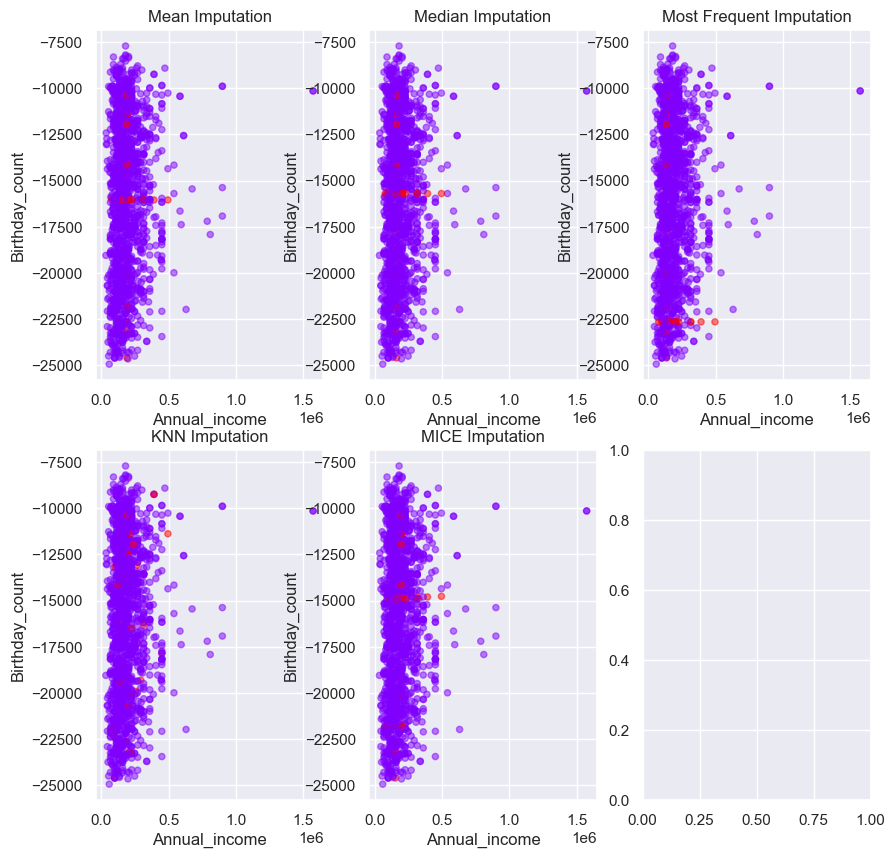

In [81]:
#VISUALIZING IMPUTATION

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10)) # creating 1 rows and 2 columns
nullity = card_df['Annual_income'].isnull() + card_df['Birthday_count'].isnull() # creating null columns betn age and BMI
imputations = { 'Mean Imputation': card_df_mean,
    'Median Imputation': card_df_median,
    'Most Frequent Imputation': card_df_mode,
    'KNN Imputation': card_df_knn,
    'MICE Imputation': card_df_MICE}

for ax, df_key in zip(axes.flatten(), imputations): # a for loop to iterate over the subplots and the imputed data
    imputations[df_key].plot(x='Annual_income', y='Birthday_count', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

<Axes: xlabel='Annual_income', ylabel='Count'>

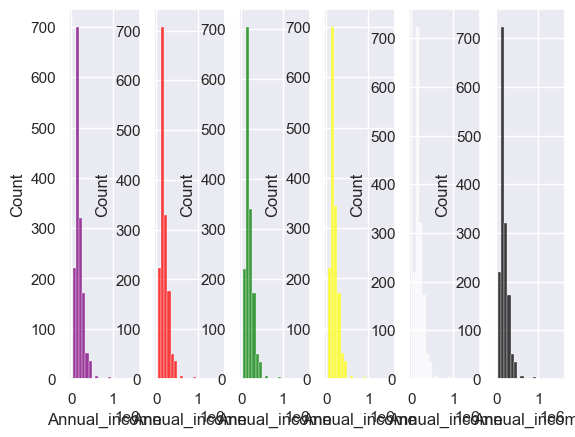

In [82]:
fig, ax =plt.subplots(1,6)
sns.histplot(card_df['Annual_income'],bins=20, color="purple", ax=ax[0])
sns.histplot(card_df_knn['Annual_income'], color="red", bins=20, ax=ax[1])
sns.histplot(card_df_MICE['Annual_income'], color="green", bins=20, ax=ax[2])

sns.histplot(card_df_mean['Annual_income'], color="yellow", bins=20, ax=ax[3])
sns.histplot(card_df_median['Annual_income'], color="white", bins=20, ax=ax[4])
sns.histplot(card_df_mode['Annual_income'], color="black", bins=20, ax=ax[5])

<Axes: xlabel='Birthday_count', ylabel='Count'>

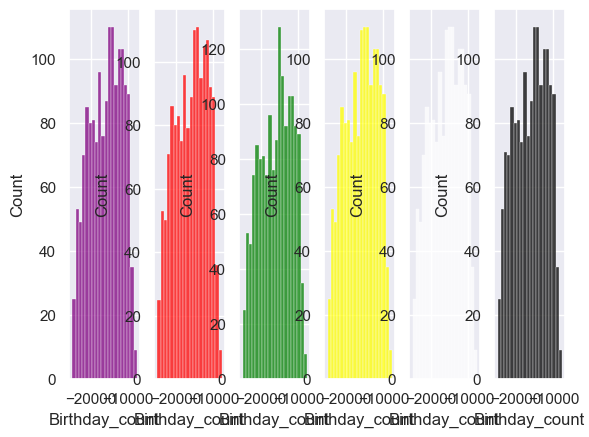

In [83]:
fig, ax =plt.subplots(1,6)
sns.histplot(card_df['Birthday_count'],bins=20, color="purple", ax=ax[0])
sns.histplot(card_df_knn['Birthday_count'], color="red", bins=20, ax=ax[1])
sns.histplot(card_df_MICE['Birthday_count'], color="green", bins=20, ax=ax[2])

sns.histplot(card_df_mean['Birthday_count'], color="yellow", bins=20, ax=ax[3])
sns.histplot(card_df_median['Birthday_count'], color="white", bins=20, ax=ax[4])
sns.histplot(card_df_mode['Birthday_count'], color="black", bins=20, ax=ax[5])

Visualization clearly suggest KNN imputation as a better approach to deal with missing values.

In [84]:
card_df_knn.corr()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Family_Members,label,education_ordinal,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,occupation_ordinal
Ind_ID,1.000000,0.031011,0.034331,0.027582,-0.058307,0.010014,-0.042415,0.015050,0.017351,0.029916,...,-0.033753,0.007881,0.015655,0.012432,-0.062826,0.065953,0.015491,0.005045,0.014882,-0.057330
CHILDREN,0.031011,1.000000,0.080976,0.278748,-0.219120,-0.006054,0.023954,0.890441,-0.019374,-0.010425,...,0.145411,0.002533,-0.133104,-0.096974,0.024250,-0.045377,0.003063,-0.012099,0.016439,-0.130624
Annual_income,0.034331,0.080976,1.000000,0.113841,-0.159876,-0.008689,0.117827,0.055120,0.018186,-0.163867,...,-0.018185,-0.009919,0.067480,-0.065202,0.009564,-0.039942,0.045630,0.021415,0.002998,-0.155089
Birthday_count,0.027582,0.278748,0.113841,1.000000,-0.620051,-0.029418,0.163302,0.264631,-0.043329,0.000879,...,0.040238,-0.082683,0.112467,-0.244444,-0.168435,-0.002616,-0.019156,0.084090,0.205957,-0.337374
Employed_days,-0.058307,-0.219120,-0.159876,-0.620051,1.000000,-0.001118,-0.118025,-0.239585,0.030843,0.034710,...,-0.089658,0.035414,-0.029434,0.268514,0.061158,0.067324,-0.034771,-0.037496,-0.103355,0.520986
Phone,0.010014,-0.006054,-0.008689,-0.029418,-0.001118,1.000000,0.015692,0.004357,-0.001799,0.007412,...,0.027647,0.015876,-0.070164,0.058008,0.038321,-0.018020,-0.032721,-0.017855,-0.027726,-0.022857
EMAIL_ID,-0.042415,0.023954,0.117827,0.163302,-0.118025,0.015692,1.000000,0.033039,0.009560,-0.047739,...,0.032627,0.020951,-0.024261,-0.061634,-0.011630,0.001430,-0.024419,0.020607,0.017501,-0.126030
Family_Members,0.015050,0.890441,0.055120,0.264631,-0.239585,0.004357,0.033039,1.000000,-0.029665,-0.022668,...,0.500189,-0.200359,-0.415289,-0.258161,0.044238,-0.077357,0.013831,0.003501,0.012983,-0.128934
label,0.017351,-0.019374,0.018186,-0.043329,0.030843,-0.001799,0.009560,-0.029665,1.000000,-0.023354,...,-0.022919,0.021701,0.058951,-0.002636,-0.070480,0.115404,0.027378,0.030074,-0.034894,0.014964
education_ordinal,0.029916,-0.010425,-0.163867,0.000879,0.034710,0.007412,-0.047739,-0.022668,-0.023354,1.000000,...,-0.081417,-0.028631,0.021504,0.065663,-0.021732,0.004652,0.019194,0.037806,0.000997,0.129434


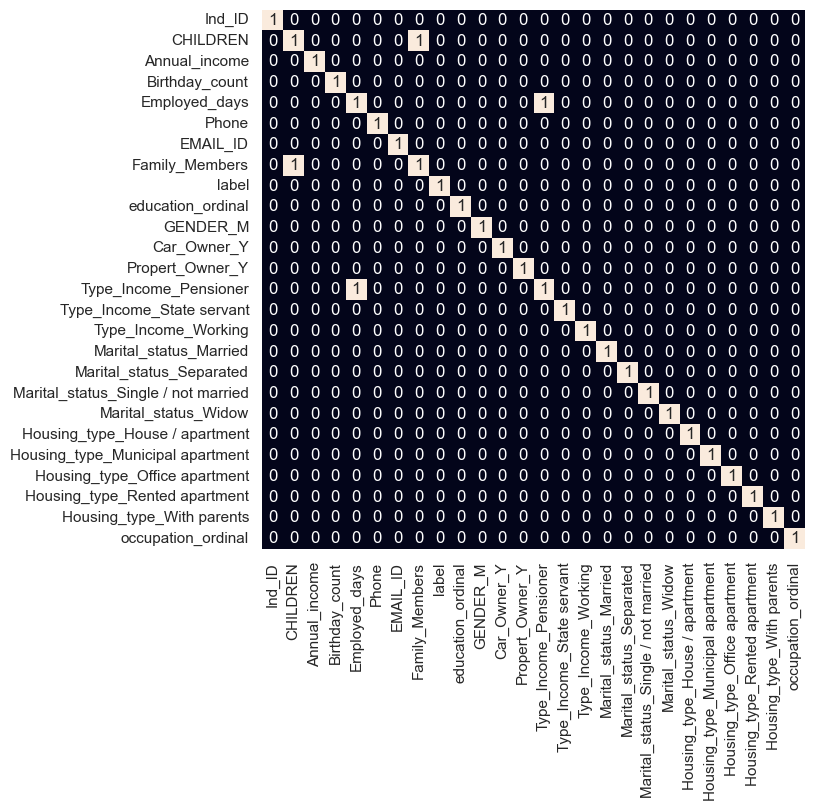

In [85]:
plt.figure(figsize=(7, 7))
sns.heatmap(card_df_knn.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [86]:
corr = card_df_knn.corr(method = "spearman")

corr

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Family_Members,label,education_ordinal,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,occupation_ordinal
Ind_ID,1.000000,0.026155,-0.004998,0.026997,-0.025781,0.007702,-0.044812,0.007507,0.016660,0.031624,...,-0.031504,0.004422,0.015187,0.012515,-0.064325,0.068321,0.014090,0.001120,0.016675,-0.057119
CHILDREN,0.026155,1.000000,0.068253,0.335673,-0.167271,0.014571,0.055700,0.814514,-0.014037,-0.054203,...,0.167353,-0.037387,-0.142186,-0.118403,0.021124,-0.057667,0.006082,0.001319,0.024474,-0.167294
Annual_income,-0.004998,0.068253,1.000000,0.115632,-0.170873,-0.018942,0.116438,0.047148,-0.006160,-0.210101,...,0.002525,-0.004486,0.038232,-0.065536,0.020510,-0.055377,0.007358,0.027804,0.015048,-0.155363
Birthday_count,0.026997,0.335673,0.115632,1.000000,-0.219020,-0.033692,0.161154,0.274774,-0.043060,-0.079769,...,0.036402,-0.085995,0.115748,-0.233455,-0.170876,0.000044,-0.022695,0.085024,0.208560,-0.341643
Employed_days,-0.025781,-0.167271,-0.170873,-0.219020,1.000000,-0.006769,0.006363,-0.191771,0.103272,0.015270,...,-0.090241,0.021927,0.028089,0.177746,-0.024365,0.059013,-0.047381,-0.013073,0.012074,0.408277
Phone,0.007702,0.014571,-0.018942,-0.033692,-0.006769,1.000000,0.015692,0.019702,-0.001799,-0.003166,...,0.027647,0.015876,-0.070164,0.058008,0.038321,-0.018020,-0.032721,-0.017855,-0.027726,-0.016866
EMAIL_ID,-0.044812,0.055700,0.116438,0.161154,0.006363,0.015692,1.000000,0.054068,0.009560,-0.082613,...,0.032627,0.020951,-0.024261,-0.061634,-0.011630,0.001430,-0.024419,0.020607,0.017501,-0.122837
Family_Members,0.007507,0.814514,0.047148,0.274774,-0.191771,0.019702,0.054068,1.000000,-0.025891,-0.051008,...,0.602356,-0.273932,-0.493944,-0.312323,0.046796,-0.092768,0.018276,0.016590,0.017411,-0.144570
label,0.016660,-0.014037,-0.006160,-0.043060,0.103272,-0.001799,0.009560,-0.025891,1.000000,-0.020597,...,-0.022919,0.021701,0.058951,-0.002636,-0.070480,0.115404,0.027378,0.030074,-0.034894,0.013742
education_ordinal,0.031624,-0.054203,-0.210101,-0.079769,0.015270,-0.003166,-0.082613,-0.051008,-0.020597,1.000000,...,-0.075702,-0.039684,0.018398,0.088538,-0.019355,0.028550,0.014016,0.030918,-0.018209,0.159942


Text(0.5, 1.0, 'Spearman Correlation')

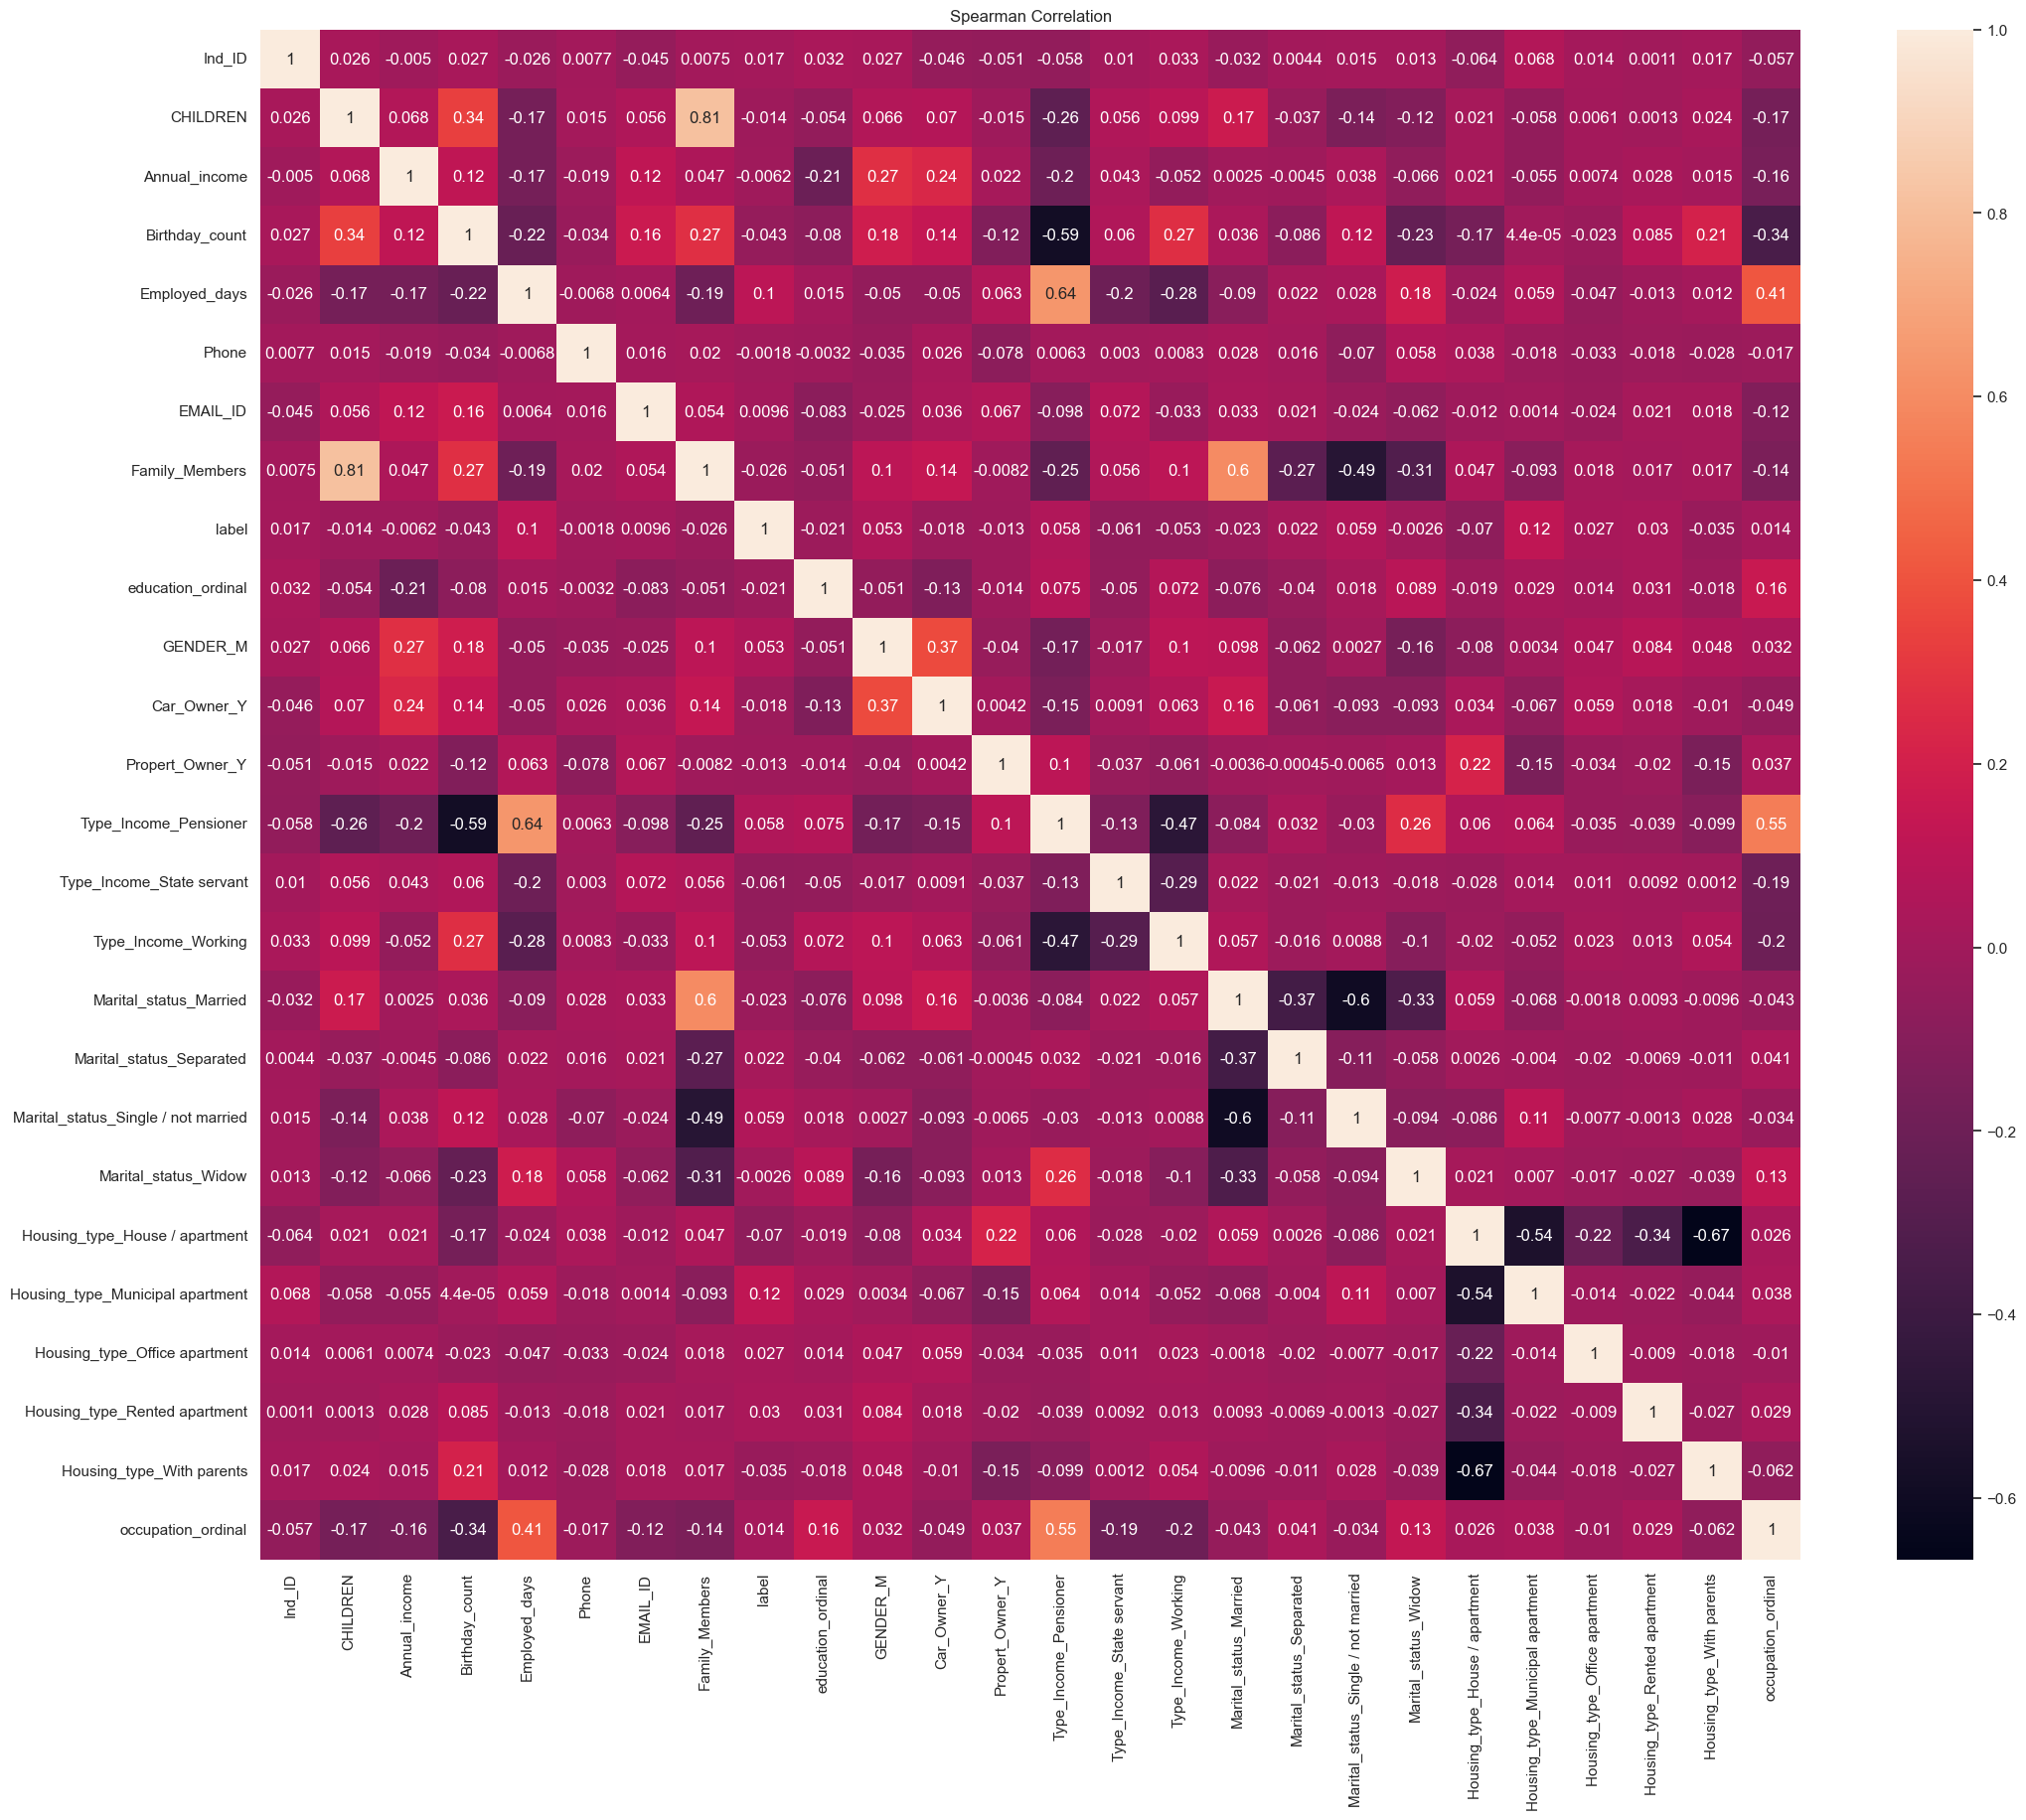

In [87]:

plt.figure(figsize=(25,20))
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, annot = True)
plt.title("Spearman Correlation")

In [88]:

# Sort the 'Employed_days' column and then count the values
sorted_dates = card_data['Employed_days'].value_counts().sort_index()

# Display the sorted date values and their counts
print(sorted_dates)

Employed_days
-14887       1
-13735       1
-13382       1
-13010       1
-12870       1
          ... 
-95          1
-89          1
-88          1
-73          2
 365243    261
Name: count, Length: 956, dtype: int64


In [89]:
import pandas as pd
import numpy as np


# Replace '365243' with NaN to prepare for median calculation
card_df_knn['Employed_days'].replace(365243, np.nan, inplace=True)

# Calculate the median of the 'Employed_days' column
median_value = card_df_knn['Employed_days'].median()

# Replace NaN values (previously '365243') with the calculated median
card_df_knn['Employed_days'].fillna(median_value, inplace=True)


In [90]:
card_df_knn.head(10)


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Family_Members,label,education_ordinal,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,occupation_ordinal
0,5008827,0,180000.000000,-18772.000000,-1953.0,0,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,5009744,0,315000.000000,-13557.000000,-586.0,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2,5009746,0,315000.000000,-13556.999361,-586.0,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,5009749,0,314998.951607,-13557.000000,-586.0,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
4,5009752,0,315000.000000,-13557.000000,-586.0,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
6,5009754,0,315000.000000,-13557.000000,-586.0,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
7,5009894,0,180000.000000,-22134.000000,-1953.0,0,0,2,1,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
8,5010864,1,450000.000000,-18173.000000,-678.0,1,1,3,1,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
9,5010868,1,450000.000000,-18173.000000,-678.0,1,1,3,1,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
10,5010869,1,450000.000000,-18173.000000,-678.0,1,1,1,1,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


### convert the columns 'Birthday_count'and 'Employed_days' in date format

In [91]:

import datetime
from datetime import timedelta

In [92]:
dir(datetime.date)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'ctime',
 'day',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'min',
 'month',
 'replace',
 'resolution',
 'strftime',
 'timetuple',
 'today',
 'toordinal',
 'weekday',
 'year']

In [93]:
card_df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1547
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ind_ID                               1541 non-null   int64  
 1   CHILDREN                             1541 non-null   int64  
 2   Annual_income                        1541 non-null   float64
 3   Birthday_count                       1541 non-null   float64
 4   Employed_days                        1541 non-null   float64
 5   Phone                                1541 non-null   int64  
 6   EMAIL_ID                             1541 non-null   int64  
 7   Family_Members                       1541 non-null   int64  
 8   label                                1541 non-null   int64  
 9   education_ordinal                    1541 non-null   int64  
 10  GENDER_M                             1541 non-null   float64
 11  Car_Owner_Y                        

In [94]:
## This function takes no of days and convert it into their datetime format
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  



In [95]:
card_df_knn['Birthday_count']=card_df_knn['Birthday_count'].apply(Date_of_Birth)


In [96]:
card_df_knn.head()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Family_Members,label,education_ordinal,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,occupation_ordinal
0,5008827,0,180000.000000,1972-04-28,-1953.0,0,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,5009744,0,315000.000000,1986-08-08,-586.0,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2,5009746,0,315000.000000,1986-08-08,-586.0,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,5009749,0,314998.951607,1986-08-08,-586.0,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
4,5009752,0,315000.000000,1986-08-08,-586.0,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4


In [97]:
## Creating a  Function that takes value of column Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')
    return employed_date

In [98]:
card_df_knn['Employed_days']=card_df_knn['Employed_days'].apply(Employed_day)

In [99]:
card_df_knn.head()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Family_Members,label,education_ordinal,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,occupation_ordinal
0,5008827,0,180000.000000,1972-04-28,2018-05-16,0,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,5009744,0,315000.000000,1986-08-08,2022-02-11,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2,5009746,0,315000.000000,1986-08-08,2022-02-11,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,5009749,0,314998.951607,1986-08-08,2022-02-11,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
4,5009752,0,315000.000000,1986-08-08,2022-02-11,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4


In [100]:
print("Getting the unique values of each column")
print("- - - - - - - - - - - - - - -")
unique_data = {}
for column in card_df_knn.columns:
    unique_data[column] = card_df_knn[column].unique()
unique_data

Getting the unique values of each column
- - - - - - - - - - - - - - -


{'Ind_ID': array([5008827, 5009744, 5009746, ..., 5115992, 5118219, 5053790],
       dtype=int64),
 'CHILDREN': array([ 0,  1,  2,  4,  3, 14], dtype=int64),
 'Annual_income': array([ 180000.        ,  315000.        ,  314998.95160701,
         450000.        ,   90000.        ,   90000.02764289,
         472500.        ,  270000.        ,  126000.        ,
         202500.        ,  157500.        ,  112500.        ,
         540000.        ,  112504.18830529,  135000.        ,
         292500.        ,   76500.        ,  215100.        ,
         225000.        ,   67500.        ,  171000.        ,
         103500.        ,   99000.        ,   99000.03365227,
         391500.        ,   65250.        ,   72900.        ,
         179999.94696513,  256500.        ,  675000.        ,
         247500.        ,   85500.        ,  121500.        ,
         166251.77346477,  130500.        ,  180000.26181364,
         211500.        ,   81000.        ,   72000.        ,
         148500.   

In [101]:
# Sort the 'Employed_days' column and then count the values
sorted_dates = card_df_knn['Employed_days'].value_counts().sort_index()

# Display the sorted date values and their counts
print(sorted_dates)


Employed_days
1982-12-17    1
1986-02-11    1
1987-01-30    1
1988-02-06    1
1988-06-25    1
             ..
2023-06-16    1
2023-06-17    1
2023-06-23    1
2023-06-24    1
2023-07-09    2
Name: count, Length: 952, dtype: int64


In [102]:
#Creating a function to calculate age of the employee
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age

In [103]:
card_df_knn['Birthday_count']=card_df_knn['Birthday_count'].apply(AGE)

In [104]:
#Creating a function to calculate YEARS of the employement
def years_emp(years_employed):
    today=datetime.date.today()
    years=datetime.datetime.strptime(years_employed,'%Y-%m-%d')
    years_emp=today.year-years.year
    return years_emp

In [105]:
card_df_knn['Employed_days']=card_df_knn['Employed_days'].apply(years_emp)

In [106]:
card_df_knn.head()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,Family_Members,label,education_ordinal,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,occupation_ordinal
0,5008827,0,180000.000000,51,5,0,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,5009744,0,315000.000000,37,1,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2,5009746,0,315000.000000,37,1,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,5009749,0,314998.951607,37,1,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
4,5009752,0,315000.000000,37,1,1,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4


In [107]:
card_df_knn.rename(columns={'Employed_days': 'Years_emp'}, inplace=True)


In [108]:
card_df_knn.rename(columns={'Birthday_count': 'Age'}, inplace=True)

In [109]:
card_df_knn.head(1)

,Ind_ID,CHILDREN,Annual_income,Age,Years_emp,Phone,EMAIL_ID,Family_Members,label,education_ordinal,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,occupation_ordinal
0,5008827,0,180000.0,51,5,0,0,2,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4


In [110]:
card_df_knn.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Age', 'Years_emp', 'Phone',
       'EMAIL_ID', 'Family_Members', 'label', 'education_ordinal', 'GENDER_M',
       'Car_Owner_Y', 'Propert_Owner_Y', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'occupation_ordinal'],
      dtype='object')

In [111]:
card_df_knn.drop('Ind_ID', axis=1, inplace=True)


In [112]:
card_df_knn.columns

Index(['CHILDREN', 'Annual_income', 'Age', 'Years_emp', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label', 'education_ordinal', 'GENDER_M',
       'Car_Owner_Y', 'Propert_Owner_Y', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'occupation_ordinal'],
      dtype='object')

In [113]:
card_df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 0 to 1547
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CHILDREN                             1541 non-null   int64  
 1   Annual_income                        1541 non-null   float64
 2   Age                                  1541 non-null   int64  
 3   Years_emp                            1541 non-null   int64  
 4   Phone                                1541 non-null   int64  
 5   EMAIL_ID                             1541 non-null   int64  
 6   Family_Members                       1541 non-null   int64  
 7   label                                1541 non-null   int64  
 8   education_ordinal                    1541 non-null   int64  
 9   GENDER_M                             1541 non-null   float64
 10  Car_Owner_Y                          1541 non-null   float64
 11  Propert_Owner_Y                    

# TRAINING MODEL

In [114]:
x = card_df_knn.drop('label', axis=1)   # features
y = card_df_knn['label']           # target

In [115]:
y.value_counts()

label
0    1371
1     170
Name: count, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
x_train = sc.fit_transform(x_train)

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
x_test = sc.transform(x_test)

In [118]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
x_train = sc.fit_transform(x_train)

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
x_test = sc.transform(x_test)

In [119]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from xgboost import XGBClassifier
#import xgboost
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve
## import libraries


In [120]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),   # if dependent variable  is categorical/binary, use logistic.if continuous use linear regression
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train.values.ravel()) # Train Model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred =  model.predict(x_test)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.89
- F1 score: 0.837274
- Precision: 0.901174
- Recall: 0.888799
----------------------------------
Model performance for Test set
- Accuracy: 0.89
- Fl score: 0.85
- Precision: 0.84
- Recall: 0.89


Decision Tree
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.996753
- Precision: 0.996753
- Recall: 0.996753
----------------------------------
Model performance for Test set
- Accuracy: 0.87
- Fl score: 0.88
- Precision: 0.90
- Recall: 0.87


Random Forest
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.996753
- Precision: 0.996753
- Recall: 0.996753
----------------------------------
Model performance for Test set
- Accuracy: 0.94
- Fl score: 0.93
- Precision: 0.94
- Recall: 0.94


Support Vector Machine
Model performance for Training set
- Accuracy: 0.89
- F1 score: 0.846798
- Precision: 0.904393
- Recall: 0.892857
----------------------------------
Model performance for Test set
-

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

SMOTE- for Imbalanced dataset

In [121]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [122]:
from imblearn.over_sampling import SMOTE
  
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [123]:
y_smote.value_counts()

label
1    1371
0    1371
Name: count, dtype: int64

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)


In [125]:
#Model building after applying SMOTE

In [126]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train.values.ravel()) # Training each of the Models


    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred =  model.predict(x_test)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logisitic Regression
Model performance for Training set
- Accuracy: 0.51
- F1 score: 0.339431
- Precision: 0.255502
- Recall: 0.505472
----------------------------------
Model performance for Test set
- Accuracy: 0.49
- Fl score: 0.32
- Precision: 0.24
- Recall: 0.49


Decision Tree
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.996352
- Precision: 0.996357
- Recall: 0.996352
----------------------------------
Model performance for Test set
- Accuracy: 0.90
- Fl score: 0.90
- Precision: 0.90
- Recall: 0.90


Random Forest
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.996352
- Precision: 0.996353
- Recall: 0.996352
----------------------------------
Model performance for Test set
- Accuracy: 0.97
- Fl score: 0.97
- Precision: 0.97
- Recall: 0.97


Support Vector Machine
Model performance for Training set
- Accuracy: 0.54
- F1 score: 0.510231
- Precision: 0.548807
- Recall: 0.539865
----------------------------------
Model performance for Test set
-

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.92
- F1 score: 0.915860
- Precision: 0.919967
- Recall: 0.916102
----------------------------------
Model performance for Test set
- Accuracy: 0.81
- Fl score: 0.81
- Precision: 0.82
- Recall: 0.81




In [127]:
#The Random Forest model seems to be the best-performing model in your case, both before and after applying SMOTE